In [412]:
# Import the relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from scipy import stats
from pandas import DataFrame

# set this so the graphs open internally
%matplotlib inline

In [6]:
# Read all the files
# main netflix file
netflix_titles = pd.read_csv("netflix_titles.csv")
# netflix original content files
netflix_original = pd.read_csv("netflix_original_movie_data.csv")
# imdb basic name (title) file
imdb_title_basic = pd.read_csv("title.basics.tsv", sep='\t')
# imdb rating file
imdb_ratings = pd.read_csv("title.ratings.tsv", sep='\t')

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [7]:
netflix_original["original"] = 1

In [8]:
netflix_original

Unnamed: 0                                             Title  \
0             0                               Beasts of No Nation   
1             1                                  The Ridiculous 6   
2             2  Crouching Tiger, Hidden Dragon: Sword of Destiny   
3             3                             Pee-wee's Big Holiday   
4             4                            Special Correspondents   
..          ...                                               ...   
518         518                                 What Did Jack Do?   
519         519                                      Road to Roma   
520         520                           Sitara: Let Girls Dream   
521         521       Ben Platt Live from Radio City Musical Hall   
522         522                              The Boys in the Band   

                        Directed by  \
0                Cary Joji Fukunaga   
1                      Frank Coraci   
2                     Yuen Woo-ping   
3                          John Lee   
4                     Ricky Gervais   
..                              ...   
518                     David Lynch   
519  Andres Clariond Gabriel Nuncio   
520           Sharmeen Obaid-Chinoy   
521         Alex Timbers Sam Wrench   
522                    Joe Mantello   

                                           Produced by  \
0    Amy Kaufman Cary Joji Fukunaga Daniela Taplin ...   
1               Allen Covert Adam Sandler Ted Sarandos   
2                      Charlie Nguyen Harvey Weinstein   
3                      ['Judd Apatow', 'Paul Reubens']   
4    Chris Coen Aaron L. Gilbert Ricky Gervais Ted ...   
..                                                 ...   
518                              Sabrina S. Sutherland   
519                                                NaN   
520                                     Gloria Steinem   
521                                         Gary Lanvy   
522  Ryan Murphy David Stone Joe Mantello Ned Marte...   

               Screenplay by  \
0         Cary Joji Fukunaga   
1                        NaN   
2                 John Fusco   
3                        NaN   
4                        NaN   
..                       ...   
518                      NaN   
519                      NaN   
520                      NaN   
521                      NaN   
522  Mart Crowley Ned Martel   

                                              Based on  \
0        ['Beasts of No Nation', 'by Uzodinma Iweala']   
1                                                  NaN   
2      ['Iron Knight, Silver Vase', 'by', 'Wang Dulu']   
3                                                  NaN   
4    ['Envoyés très spéciaux', 'by Simon Michaël & ...   
..                                                 ...   
518                                                NaN   
519                                                NaN   
520                                                NaN   
521                                                NaN   
522        ['The Boys in the Band', 'by Mart Crowley']   

                                              Starring  \
0    Idris Elba Abraham Attah Kurt Egyiawan Jude Ak...   
1    Adam Sandler Terry Crews Jorge Garcia Taylor L...   
2                             Donnie Yen Michelle Yeoh   
3                  ['Paul Reubens', 'Joe Manganiello']   
4    Ricky Gervais Eric Bana Vera Farmiga Kevin Pol...   
..                                                 ...   
518                                        David Lynch   
519      Yalitza Aparicio Odín Ayala Eugenio Caballero   
520                                                NaN   
521  Ben Platt Crystal Monee Hall Kojo Littles Alle...   
522  Jim Parsons Zachary Quinto Matt Bomer Andrew R...   

                               Music by                  Cinematography  \
0                             Dan Romer              Cary Joji Fukunaga   
1    Rupert Gregson-Williams Elmo Weber                     Dean Semler   
2     

In [128]:
netflix_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523 entries, 0 to 522
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            523 non-null    int64  
 1   Title                 521 non-null    object 
 2   Directed by           515 non-null    object 
 3   Produced by           398 non-null    object 
 4   Screenplay by         109 non-null    object 
 5   Based on              99 non-null     object 
 6   Starring              453 non-null    object 
 7   Music by              329 non-null    object 
 8   Cinematography        357 non-null    object 
 9   Edited by             360 non-null    object 
 10  Production companies  125 non-null    object 
 11  Distributed by        506 non-null    object 
 12  Release date          490 non-null    object 
 13  Running time          452 non-null    object 
 14  Country               500 non-null    object 
 15  Language              5

In [9]:
# delete all columns except Title and original
# https://stackoverflow.com/questions/26347412/drop-multiple-columns-in-pandas/26347456
netflix_original.drop(netflix_original.iloc[:, 2:48], inplace=True, axis=1)

In [10]:
netflix_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523 entries, 0 to 522
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  523 non-null    int64 
 1   Title       521 non-null    object
 2   original    523 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 12.4+ KB


In [11]:
netflix_original.drop(['Unnamed: 0'], inplace=True, axis=1)

In [12]:
netflix_original

Title  original
0                                 Beasts of No Nation         1
1                                    The Ridiculous 6         1
2    Crouching Tiger, Hidden Dragon: Sword of Destiny         1
3                               Pee-wee's Big Holiday         1
4                              Special Correspondents         1
..                                                ...       ...
518                                 What Did Jack Do?         1
519                                      Road to Roma         1
520                           Sitara: Let Girls Dream         1
521       Ben Platt Live from Radio City Musical Hall         1
522                              The Boys in the Band         1

[523 rows x 2 columns]

In [13]:
netflix_combined_df = pd.merge(netflix_titles, netflix_original, how="left", left_on="title", \
                               right_on="Title", sort=True, copy=True)

In [14]:
netflix_combined_df['original'] = netflix_combined_df['original'].fillna(0)

In [15]:
netflix_combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7798 entries, 0 to 7797
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       7798 non-null   object 
 1   type          7798 non-null   object 
 2   title         7798 non-null   object 
 3   director      5408 non-null   object 
 4   cast          7078 non-null   object 
 5   country       7291 non-null   object 
 6   date_added    7788 non-null   object 
 7   release_year  7798 non-null   int64  
 8   rating        7791 non-null   object 
 9   duration      7798 non-null   object 
 10  listed_in     7798 non-null   object 
 11  description   7798 non-null   object 
 12  Title         428 non-null    object 
 13  original      7798 non-null   float64
dtypes: float64(1), int64(1), object(12)
memory usage: 913.8+ KB


In [16]:
netflix_combined_df

show_id     type                          title  \
0        s28    Movie                         #Alive   
1        s29    Movie  #AnneFrank - Parallel Stories   
2        s32    Movie              #FriendButMarried   
3        s33    Movie            #FriendButMarried 2   
4        s35    Movie                          #Roxy   
...      ...      ...                            ...   
7793    s557  TV Show                       忍者ハットリくん   
7794   s2083  TV Show                           海的儿子   
7795   s3072  TV Show                           마녀사냥   
7796   s2930    Movie                        반드시 잡는다   
7797   s3090    Movie            최강전사 미니특공대 : 영웅의 탄생   

                         director  \
0                          Cho Il   
1     Sabina Fedeli, Anna Migotto   
2                   Rako Prijanto   
3                   Rako Prijanto   
4                 Michael Kennedy   
...                           ...   
7793                          NaN   
7794                          NaN   
7795                          NaN   
7796                Hong-seon Kim   
7797                Young Jun Lee   

                                                   cast      country  \
0                              Yoo Ah-in, Park Shin-hye  South Korea   
1                           Helen Mirren, Gengher Gatti        Italy   
2     Adipati Dolken, Vanesha Prescilla, Rendi Jhon,...    Indonesia   
3     Adipati Dolken, Mawar de Jongh, Sari Nila, Von...    Indonesia   
4     Jake Short, Sarah Fisher, Booboo Stewart, Dann...       Canada   
...                                                 ...          ...   
7793                                                NaN        Japan   
7794  Li Nanxing, Christopher Lee, Jesseca Liu, Appl...          NaN   
7795  Si-kyung Sung, Se-yoon Yoo, Dong-yup Shin, Ji-...  South Korea   
7796                                      Baek Yoon-sik  South Korea   
7797  Um Sang-hyun, Yang Jeong-hwa, Jeon Tae-yeol, S...          NaN   

              date_added  release_year rating   duration  \
0      September 8, 2020          2020  TV-MA     99 min   
1           July 1, 2020          2019  TV-14     95 min   
2           May 21, 2020          2018   TV-G    102 min   
3          June 28, 2020          2020   TV-G    104 min   
4         April 10, 2019          2018  TV-14    105 min   
...                  ...           ...    ...        ...   
7793   December 23, 2018          2012  TV-Y7  2 Seasons   
7794      April 27, 2018          2016  TV-14   1 Season   
7795   February 19, 2018          2015  TV-MA   1 Season   
7796   February 28, 2018          2017  TV-MA    110 min   
7797   September 1, 2018          2018  TV-Y7     68 min   

                                              listed_in  \
0        Horror Movies, International Movies, Thrillers   
1                   Documentaries, International Movies   
2         Dramas, International Movies, Romantic Movies   
3         Dramas, International Movies, Romantic Movies   
4                             Comedies, Romantic Movies   
...                                                 ...   
7793                             Anime Series, Kids' TV   
7794                  International TV Shows, TV Dramas   
7795  International TV Shows, Korean TV Shows, Stand...   
7796            Dramas, International Movies, Thrillers   
7797                           Children & Family Movies   

                                            description Title  original  
0     As a grisly virus rampages a city, a lone man ...   NaN       0.0  
1     Through her diary, Anne Frank's story is retol...   NaN       0.0  
2     Pining for his high school crush for years, a ...   NaN       0.0  
3     As Ayu and Ditto finally transition from best ...   NaN       0.0  
4     A teenage hacker with a huge nose helps a cool...   NaN       0.0  
...                                                 ...   ...       ...  
7793  Hailing from the mountains of Iga, Kanzo Hatto...   NaN       0.0  


In [17]:
netflix_combined_df['show_id'] = netflix_combined_df['show_id'].str[1:]
netflix_combined_df['show_id'] = pd.to_numeric(netflix_combined_df['show_id'])
netflix_combined_df.sort_values(by=['show_id'], ascending=True, inplace=True)

In [18]:
#set show_id as index
netflix_combined_df.set_index('show_id', inplace=True)

In [19]:
netflix_combined_df

type                                    title           director  \
show_id                                                                        
1        TV Show                                       3%                NaN   
2          Movie                                     7:19  Jorge Michel Grau   
3          Movie                                    23:59       Gilbert Chan   
4          Movie                                        9        Shane Acker   
5          Movie                                       21     Robert Luketic   
...          ...                                      ...                ...   
7783       Movie                                     Zozo        Josef Fares   
7784       Movie                                   Zubaan        Mozez Singh   
7785       Movie                        Zulu Man in Japan                NaN   
7786     TV Show                    Zumbo's Just Desserts                NaN   
7787       Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS           Sam Dunn   

                                                      cast  \
show_id                                                      
1        João Miguel, Bianca Comparato, Michel Gomes, R...   
2        Demián Bichir, Héctor Bonilla, Oscar Serrano, ...   
3        Tedd Chan, Stella Chung, Henley Hii, Lawrence ...   
4        Elijah Wood, John C. Reilly, Jennifer Connelly...   
5        Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...   
...                                                    ...   
7783     Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7784     Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7785                                               Nasty C   
7786                            Adriano Zumbo, Rachel Khoo   
7787                                                   NaN   

                                                   country  \
show_id                                                      
1                                                   Brazil   
2                                                   Mexico   
3                                                Singapore   
4                                            United States   
5                                            United States   
...                                                    ...   
7783     Sweden, Czech Republic, United Kingdom, Denmar...   
7784                                                 India   
7785                                                   NaN   
7786                                             Australia   
7787                 United Kingdom, Canada, United States   

                 date_added  release_year rating   duration  \
show_id                                                       
1           August 14, 2020          2020  TV-MA  4 Seasons   
2         December 23, 2016          2016  TV-MA     93 min   
3         December 20, 2018          2011      R     78 min   
4         November 16, 2017          2009  PG-13     80 min   
5           January 1, 2020          2008  PG-13    123 min   
...                     ...           ...    ...        ...   
7783       October 19, 2020          2005  TV-MA     99 min   
7784          March 2, 2019          2015  TV-14    111 min   
7785     September 25, 2020          2019  TV-MA     44 min   
7786       October 31, 2020          2019  TV-PG   1 Season   
7787          March 1, 2020          2019  TV-MA     90 min   

                                                 listed_in  \
show_id                                                      
1        International TV Shows, TV Dramas, TV Sci-Fi &...   
2                             Dramas, International Movies   
3                      Horror Movies, International Movies   
4        Action & Adventure, Independent Movies, Sci-Fi...   
5                                                   Dramas   
...                                                    ...   
7783                          Dramas, Int

In [54]:
#netflix_combined_df.to_csv("netflix_combined.csv")

In [55]:
#netflix_titles.shape[0]

7787

In [56]:
#netflix_combined_df.shape[0]

7798

In [58]:
#netflix_combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7798 entries, 0 to 7797
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       7798 non-null   object 
 1   type          7798 non-null   object 
 2   title         7798 non-null   object 
 3   director      5408 non-null   object 
 4   cast          7078 non-null   object 
 5   country       7291 non-null   object 
 6   date_added    7788 non-null   object 
 7   release_year  7798 non-null   int64  
 8   rating        7791 non-null   object 
 9   duration      7798 non-null   object 
 10  listed_in     7798 non-null   object 
 11  description   7798 non-null   object 
 12  Title         428 non-null    object 
 13  original      7798 non-null   float64
dtypes: float64(1), int64(1), object(12)
memory usage: 913.8+ KB


In [59]:
#netflix_titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [20]:
netflix_titles.sort_values(by=['title'], ascending=True, inplace=True)

In [30]:
netflix_titles.shape[0]

7787

In [22]:
# how to remove duplicates - https://stackoverflow.com/questions/43698764/removing-rows-with-a-duplicate-column-pandas-dataframe-python
netflix_combined_df.drop_duplicates('title', inplace = True)

In [142]:
# netflix_combined_df.reset_index(inplace=True)

In [23]:
netflix_combined_df.shape[0]

7787

In [24]:
netflix_combined_df

type                                    title           director  \
show_id                                                                        
1        TV Show                                       3%                NaN   
2          Movie                                     7:19  Jorge Michel Grau   
3          Movie                                    23:59       Gilbert Chan   
4          Movie                                        9        Shane Acker   
5          Movie                                       21     Robert Luketic   
...          ...                                      ...                ...   
7783       Movie                                     Zozo        Josef Fares   
7784       Movie                                   Zubaan        Mozez Singh   
7785       Movie                        Zulu Man in Japan                NaN   
7786     TV Show                    Zumbo's Just Desserts                NaN   
7787       Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS           Sam Dunn   

                                                      cast  \
show_id                                                      
1        João Miguel, Bianca Comparato, Michel Gomes, R...   
2        Demián Bichir, Héctor Bonilla, Oscar Serrano, ...   
3        Tedd Chan, Stella Chung, Henley Hii, Lawrence ...   
4        Elijah Wood, John C. Reilly, Jennifer Connelly...   
5        Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...   
...                                                    ...   
7783     Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7784     Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7785                                               Nasty C   
7786                            Adriano Zumbo, Rachel Khoo   
7787                                                   NaN   

                                                   country  \
show_id                                                      
1                                                   Brazil   
2                                                   Mexico   
3                                                Singapore   
4                                            United States   
5                                            United States   
...                                                    ...   
7783     Sweden, Czech Republic, United Kingdom, Denmar...   
7784                                                 India   
7785                                                   NaN   
7786                                             Australia   
7787                 United Kingdom, Canada, United States   

                 date_added  release_year rating   duration  \
show_id                                                       
1           August 14, 2020          2020  TV-MA  4 Seasons   
2         December 23, 2016          2016  TV-MA     93 min   
3         December 20, 2018          2011      R     78 min   
4         November 16, 2017          2009  PG-13     80 min   
5           January 1, 2020          2008  PG-13    123 min   
...                     ...           ...    ...        ...   
7783       October 19, 2020          2005  TV-MA     99 min   
7784          March 2, 2019          2015  TV-14    111 min   
7785     September 25, 2020          2019  TV-MA     44 min   
7786       October 31, 2020          2019  TV-PG   1 Season   
7787          March 1, 2020          2019  TV-MA     90 min   

                                                 listed_in  \
show_id                                                      
1        International TV Shows, TV Dramas, TV Sci-Fi &...   
2                             Dramas, International Movies   
3                      Horror Movies, International Movies   
4        Action & Adventure, Independent Movies, Sci-Fi...   
5                                                   Dramas   
...                                                    ...   
7783                          Dramas, Int

In [29]:
# merge the imdb datasets
imdb_df = pd.merge(imdb_title_basic, imdb_ratings, how="inner", on="tconst", sort=True, copy=True)

In [31]:
imdb_df.head()

tconst titleType            primaryTitle           originalTitle  \
0  tt0000001     short              Carmencita              Carmencita   
1  tt0000002     short  Le clown et ses chiens  Le clown et ses chiens   
2  tt0000003     short          Pauvre Pierrot          Pauvre Pierrot   
3  tt0000004     short             Un bon bock             Un bon bock   
4  tt0000005     short        Blacksmith Scene        Blacksmith Scene   

  isAdult startYear endYear runtimeMinutes                    genres  \
0       0      1894      \N              1         Documentary,Short   
1       0      1892      \N              5           Animation,Short   
2       0      1892      \N              4  Animation,Comedy,Romance   
3       0      1892      \N             12           Animation,Short   
4       0      1893      \N              1              Comedy,Short   

   averageRating  numVotes  
0            5.7      1680  
1            6.0       207  
2            6.5      1417  
3            6.1       122  
4            6.1      2213

In [32]:
# merge the imdb_df to the netflix_combined_df
netflix_df = pd.merge(netflix_combined_df, imdb_df, how="left", left_on="title", right_on="primaryTitle")

In [33]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24012 entries, 0 to 24011
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   type            24012 non-null  object 
 1   title           24012 non-null  object 
 2   director        16378 non-null  object 
 3   cast            22318 non-null  object 
 4   country         22657 non-null  object 
 5   date_added      23950 non-null  object 
 6   release_year    24012 non-null  int64  
 7   rating          24005 non-null  object 
 8   duration        24012 non-null  object 
 9   listed_in       24012 non-null  object 
 10  description     24012 non-null  object 
 11  Title           1527 non-null   object 
 12  original        24012 non-null  float64
 13  tconst          22422 non-null  object 
 14  titleType       22422 non-null  object 
 15  primaryTitle    22422 non-null  object 
 16  originalTitle   22422 non-null  object 
 17  isAdult         22422 non-null 

In [34]:
netflix_df.sample(20)

type                                   title  \
14134    Movie                         Raising the Bar   
23779    Movie                                      XX   
13309    Movie                                 Paradox   
12202  TV Show                     My First First Love   
3169     Movie                           Burning Sands   
22163    Movie  To All the Boys: P.S. I Still Love You   
605      Movie                                   After   
4897     Movie                                 Destiny   
5578     Movie       Elf Pets: Santa’s Reindeer Rescue   
20196  TV Show                             The Miracle   
14648    Movie                             Revelations   
23554    Movie                         White Christmas   
24003    Movie                                    Zoom   
17807    Movie                                 The Box   
14595    Movie                                 Results   
12860  TV Show                           One More Time   
16893  TV Show                               Supergirl   
15048    Movie                                     Run   
17305    Movie                               Thank You   
4174     Movie                                Contract   

                                                director  \
14134                                          Clay Glen   
23779  Jovanka Vuckovic, Annie Clark, Roxanne Benjami...   
13309                                       Daryl Hannah   
12202                                                NaN   
3169                                     Gerard McMurray   
22163                                  Michael Fimognari   
605                                           Jenny Gage   
4897                                     Youssef Chahine   
5578                                         Chanda Bell   
20196                                                NaN   
14648                                      Vijay Jayapal   
23554                                     Michael Curtiz   
24003                                       Peter Hewitt   
17807                                      Richard Kelly   
14595                                    Andrew Bujalski   
12860                                                NaN   
16893                                         Jesse Warn   
15048                                              Jeeva   
17305                                       Anees Bazmee   
4174                                     Ram Gopal Varma   

                                                    cast  \
14134  Kelli Berglund, Lili Karamalikis, Tess Fowler,...   
23779  Natalie Brown, Jonathan Watton, Melanie Lynske...   
13309  Neil Young, Lukas Nelson, Micah Nelson, Corey ...   
12202  Ji Soo, Jung Chae-yeon, Jinyoung, Choi Ri, Kan...   
3169   Trevor Jackson, Alfre Woodard, Trevante Rhodes...   
22163  Lana Condor, Noah Centineo, Jordan Fisher, Ann...   
605    Josephine Langford, Hero Fiennes Tiffin, Selma...   
4897   Nour El-Sherif, Laila Elwi, Mahmoud Hemeida, S...   
5578   Brad Hyland, Drew Barber, Ashley Roberts, Lowr...   
20196  Donghyun Kim, Nahyun, Yang Hak Jin, Yoon Hwa Hong   
14648  Chetan, Lakshmi Priyaa Chandramouli, Ananthara...   
23554  Bing Crosby, Danny Kaye, Rosemary Clooney, Ver...   
24003  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...   
17807  Cameron Diaz, James Marsden, Frank Langella, J...   
14595  Guy Pearce, Cobie Smulders, Kevin Corrigan, Gi...   
12860  L, So-hui Yoon, Gi-du Kim, Chang-hwan Kim, Ji ...   
16893  Melissa Benoist, Mehcad Brooks, Chyler Leigh, ...   
15048  Abhishek Bachchan, Bhoomika Chawla, Mahesh Man...   
17305  Akshay Kumar, Bobby Deol, Sonam Kapoor, Irrfan...   
4174   Adhvik Mahajan, Prasad Purandhare, Sakshi Gula...   

                     country         date_added  release_year rating  \
14134              Australia     August 1, 2017          2016   TV-Y   
23779  Canada, United States      June 22, 2017          2017      R   
13309          United States     March 23, 2018      

In [36]:
netflix_df.drop_duplicates('title', inplace = True)

In [37]:
netflix_df.shape[0]

7787

In [38]:
netflix_df.to_csv("final_df.csv")

In [39]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7787 entries, 0 to 24011
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   type            7787 non-null   object 
 1   title           7787 non-null   object 
 2   director        5398 non-null   object 
 3   cast            7069 non-null   object 
 4   country         7280 non-null   object 
 5   date_added      7777 non-null   object 
 6   release_year    7787 non-null   int64  
 7   rating          7780 non-null   object 
 8   duration        7787 non-null   object 
 9   listed_in       7787 non-null   object 
 10  description     7787 non-null   object 
 11  Title           417 non-null    object 
 12  original        7787 non-null   float64
 13  tconst          6197 non-null   object 
 14  titleType       6197 non-null   object 
 15  primaryTitle    6197 non-null   object 
 16  originalTitle   6197 non-null   object 
 17  isAdult         6197 non-null   

type
Movie      AxesSubplot(0.125,0.125;0.775x0.755)
TV Show    AxesSubplot(0.125,0.125;0.775x0.755)
Name: averageRating, dtype: object

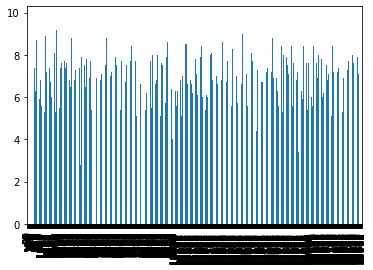

In [47]:
#netflix_df.groupby("type")["averageRating"].plot(kind="bar")

<AxesSubplot:xlabel='type'>

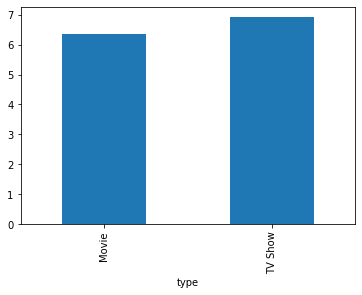

In [48]:
netflix_df.groupby("type")["averageRating"].mean().plot.bar()

<AxesSubplot:xlabel='type'>

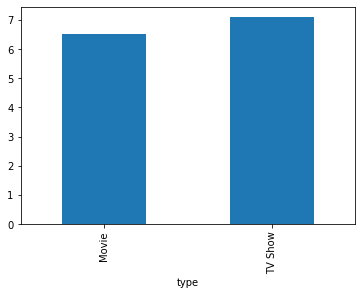

In [50]:
netflix_df.groupby("type")["averageRating"].median().plot.bar()

<AxesSubplot:xlabel='type', ylabel='averageRating'>

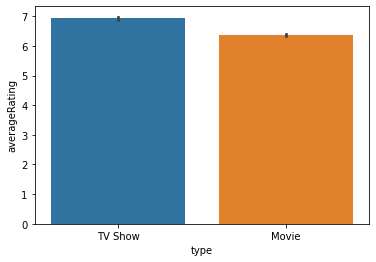

In [52]:
sns.barplot(x='type',y='averageRating',data=netflix_df)

<AxesSubplot:xlabel='type', ylabel='count'>

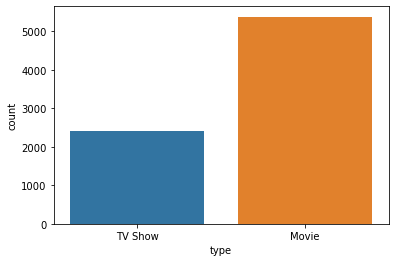

In [55]:
sns.countplot(x='type',data=netflix_df)

<AxesSubplot:xlabel='type', ylabel='averageRating'>

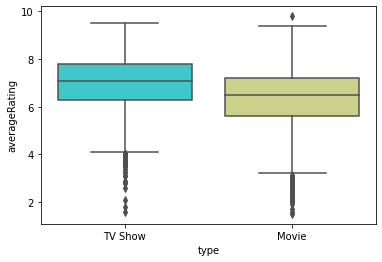

In [60]:
sns.boxplot(x="type", y="averageRating", data=netflix_df, palette='rainbow')

<AxesSubplot:xlabel='type', ylabel='numVotes'>

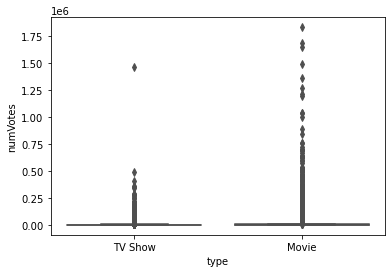

In [61]:
sns.boxplot(x="type", y="numVotes", data=netflix_df, palette='rainbow')

<AxesSubplot:xlabel='type', ylabel='numVotes'>

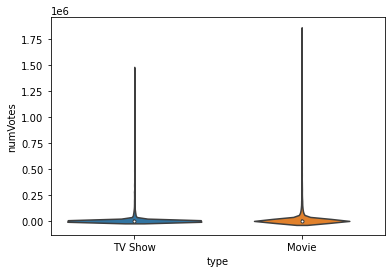

In [62]:
sns.violinplot(x="type", y="numVotes", data=netflix_df)

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')

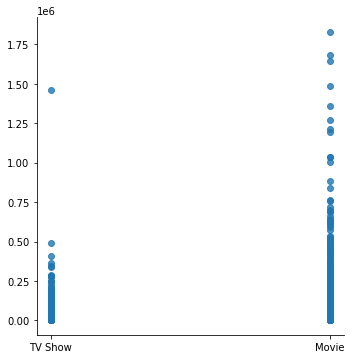

In [63]:
sns.lmplot(x='type',y='numVotes',data=netflix_df)

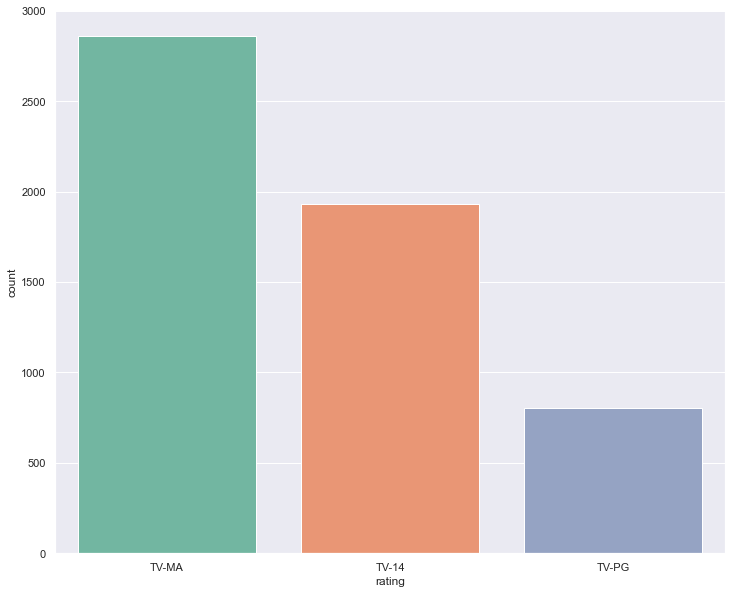

In [68]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="rating", data=netflix_df, palette="Set2", order=netflix_df['rating'].value_counts().index[0:3])

<AxesSubplot:xlabel='numVotes', ylabel='count'>

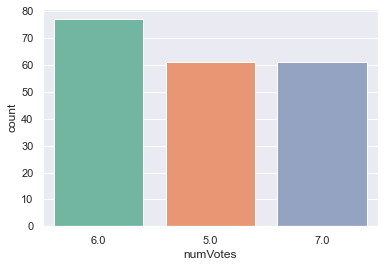

In [70]:
sns.countplot(x="numVotes", data=netflix_df, palette="Set2", order=netflix_df['numVotes'].value_counts().index[0:3])

In [74]:
netflix_df['numVotes'].corr(netflix_df['averageRating'])

0.15567936876944916

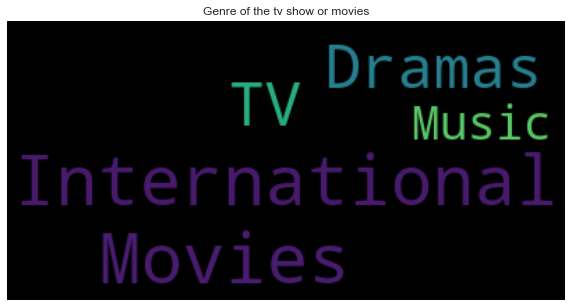

In [252]:
# https://www.kaggle.com/ritikkesharwani/netflix-visualizations
# https://www.datacamp.com/community/tutorials/wordcloud-python
wc = WordCloud(background_color='black',max_words=5)
fig=plt.figure(figsize=(10,6))
wc.generate(str(netflix_df['listed_in']))
plt.imshow(wc, interpolation="bilinear")
plt.title("Genre of the tv show or movies")
plt.axis('off')
plt.show()

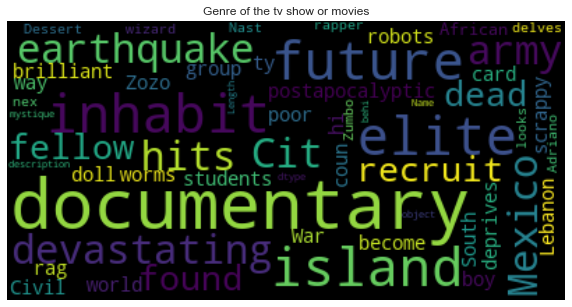

In [79]:
wc = WordCloud(background_color='black',max_words=500)
fig=plt.figure(figsize=(10,6))
wc.generate(str(netflix_df['description']))
plt.imshow(wc, interpolation="bilinear")
plt.title("Genre of the tv show or movies")
plt.axis('off')
plt.show()

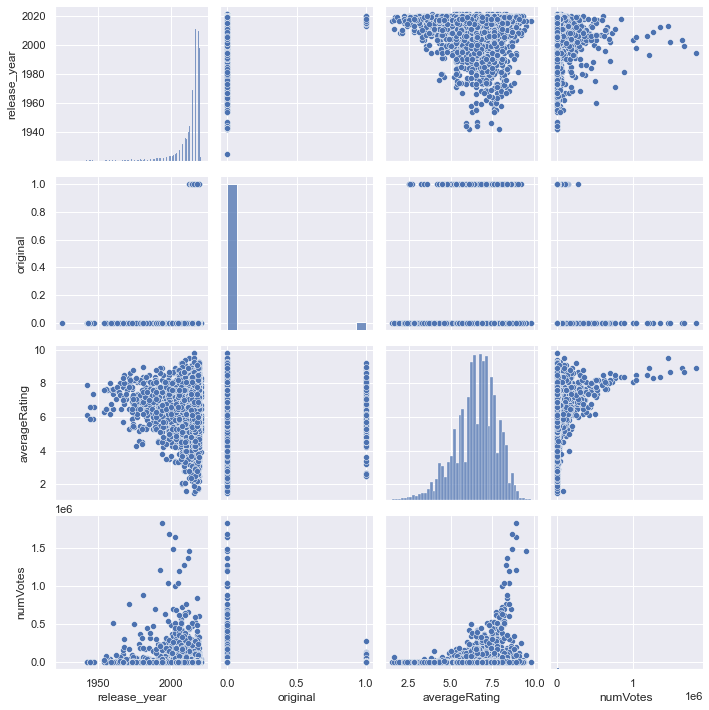

In [81]:
sns.pairplot(netflix_df)

In [ ]:
#sns.jointplot(x='description', y='listed_in', data=netflix_df, kind='reg')

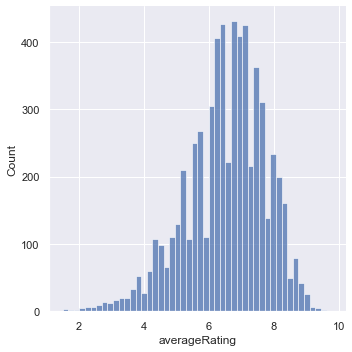

In [118]:
sns.displot(netflix_df['averageRating'])

<AxesSubplot:xlabel='numVotes'>

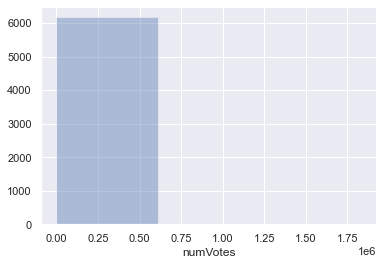

In [87]:
sns.distplot(netflix_df['numVotes'], kde=False, bins=3)

In [ ]:
# https://towardsdatascience.com/analyze-the-data-through-data-visualization-using-seaborn-255e1cd3948e

In [88]:
netflix_df

type                                    title           director  \
0      TV Show                                       3%                NaN   
2        Movie                                     7:19  Jorge Michel Grau   
3        Movie                                    23:59       Gilbert Chan   
4        Movie                                        9        Shane Acker   
14       Movie                                       21     Robert Luketic   
...        ...                                      ...                ...   
24005    Movie                                     Zozo        Josef Fares   
24007    Movie                                   Zubaan        Mozez Singh   
24009    Movie                        Zulu Man in Japan                NaN   
24010  TV Show                    Zumbo's Just Desserts                NaN   
24011    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS           Sam Dunn   

                                                    cast  \
0      João Miguel, Bianca Comparato, Michel Gomes, R...   
2      Demián Bichir, Héctor Bonilla, Oscar Serrano, ...   
3      Tedd Chan, Stella Chung, Henley Hii, Lawrence ...   
4      Elijah Wood, John C. Reilly, Jennifer Connelly...   
14     Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...   
...                                                  ...   
24005  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
24007  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
24009                                            Nasty C   
24010                         Adriano Zumbo, Rachel Khoo   
24011                                                NaN   

                                                 country          date_added  \
0                                                 Brazil     August 14, 2020   
2                                                 Mexico   December 23, 2016   
3                                              Singapore   December 20, 2018   
4                                          United States   November 16, 2017   
14                                         United States     January 1, 2020   
...                                                  ...                 ...   
24005  Sweden, Czech Republic, United Kingdom, Denmar...    October 19, 2020   
24007                                              India       March 2, 2019   
24009                                                NaN  September 25, 2020   
24010                                          Australia    October 31, 2020   
24011              United Kingdom, Canada, United States       March 1, 2020   

       release_year rating   duration  \
0              2020  TV-MA  4 Seasons   
2              2016  TV-MA     93 min   
3              2011      R     78 min   
4              2009  PG-13     80 min   
14             2008  PG-13    123 min   
...             ...    ...        ...   
24005          2005  TV-MA     99 min   
24007          2015  TV-14    111 min   
24009          2019  TV-MA     44 min   
24010          2019  TV-PG   1 Season   
24011          2019  TV-MA     90 min   

                                               listed_in  ...  titleType  \
0      International TV Shows, TV Dramas, TV Sci-Fi &...  ...    tvMovie   
2                           Dramas, International Movies  ...      movie   
3                    Horror Movies, International Movies  ...      movie   
4      Action & Adventure, Independent Movies, Sci-Fi...  ...  videoGame   
14                                                Dramas  ...      movie   
...                                                  ...  ...        ...   
24005                       Dramas, International Movies  ...      movie   
24007     Dramas, International Movies, Music & Musicals  ...      movie   
24009  Documentaries, International Movies, Music & M...  ...        NaN   
24010                 International TV Shows, Reality TV  ...   tvSeries   
24011                    Documentaries, Music & Musicals  ... 

<AxesSubplot:xlabel='averageRating', ylabel='numVotes'>

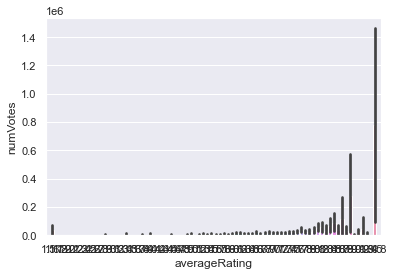

In [91]:
sns.barplot(x='averageRating',y='numVotes',data=netflix_df)

KeyboardInterrupt: 

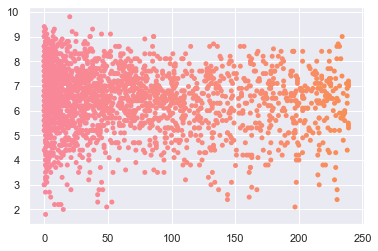

In [93]:
sns.stripplot(x="numVotes", y="averageRating", data=netflix_df)

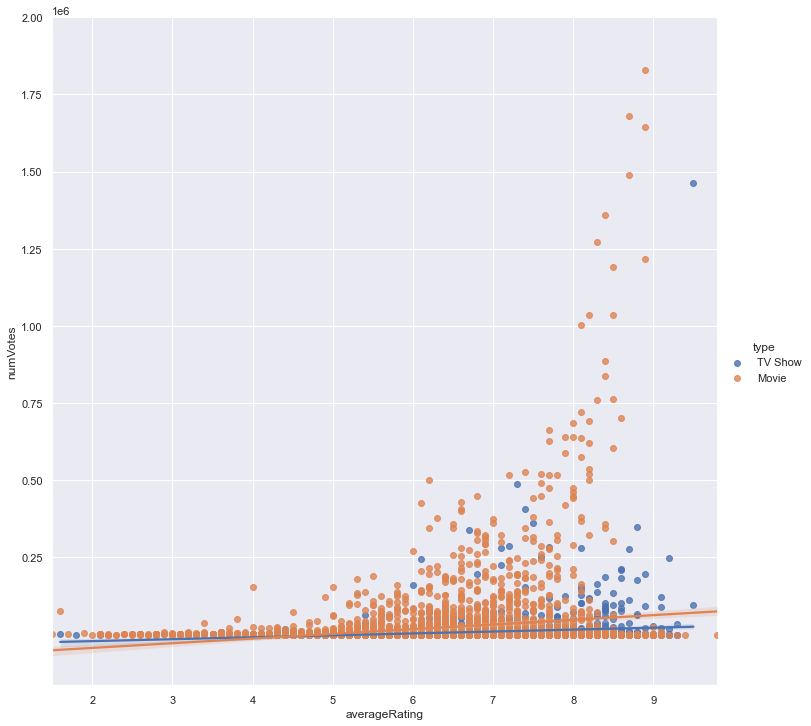

In [110]:
rating_overview = sns.lmplot(x='averageRating',y='numVotes', data=netflix_df, hue="type", height=10)
#rating_overview.set(xlim=(0, 10), ylim=(0, 2000000))
rating_overview.set(yticks=[250000, 500000, 750000, 1000000, 1250000, 1500000, 1750000, 2000000])

In [111]:
smallVotes = netflix_df[netflix_df['numVotes'] < 100]
smallVotes

type        title         director  \
4        Movie            9      Shane Acker   
14       Movie           21   Robert Luketic   
23     TV Show           46      Serdar Akar   
25       Movie          122  Yasir Al Yasiri   
35     TV Show         1983              NaN   
...        ...          ...              ...   
23953    Movie       Zodiac    David Fincher   
23961  TV Show   Zoids Wild              NaN   
23963  TV Show  Zombie Dumb              NaN   
23964    Movie   Zombieland  Ruben Fleischer   
23968  TV Show    Zona Rosa              NaN   

                                                    cast  \
4      Elijah Wood, John C. Reilly, Jennifer Connelly...   
14     Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...   
23     Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...   
25     Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...   
35     Robert Więckiewicz, Maciej Musiał, Michalina O...   
...                                                  ...   
23953  Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...   
23961  Kensho Ono, Takahiro Sakurai, Mikako Komatsu, ...   
23963                                                NaN   
23964  Jesse Eisenberg, Woody Harrelson, Emma Stone, ...   
23968  Manu NNa, Ana Julia Yeyé, Ray Contreras, Pablo...   

                     country         date_added  release_year rating  \
4              United States  November 16, 2017          2009  PG-13   
14             United States    January 1, 2020          2008  PG-13   
23                    Turkey       July 1, 2017          2016  TV-MA   
25                     Egypt       June 1, 2020          2019  TV-MA   
35     Poland, United States  November 30, 2018          2018  TV-MA   
...                      ...                ...           ...    ...   
23953          United States  November 20, 2019          2007      R   
23961                  Japan    August 14, 2020          2018  TV-Y7   
23963                    NaN       July 1, 2019          2018  TV-Y7   
23964          United States   November 1, 2019          2009      R   
23968                 Mexico  November 26, 2019          2019  TV-MA   

        duration                                          listed_in  ...  \
4         80 min  Action & Adventure, Independent Movies, Sci-Fi...  ...   
14       123 min                                             Dramas  ...   
23      1 Season    International TV Shows, TV Dramas, TV Mysteries  ...   
25        95 min                Horror Movies, International Movies  ...   
35      1 Season  Crime TV Shows, International TV Shows, TV Dramas  ...   
...          ...                                                ...  ...   
23953    158 min                     Cult Movies, Dramas, Thrillers  ...   
23961   1 Season                             Anime Series, Kids' TV  ...   
23963  2 Seasons             Kids' TV, Korean TV Shows, TV Comedies  ...   
23964     88 min                            Comedies, Horror Movies  ...   
23968   1 Season  International TV Shows, Spanish-Language TV Sh...  ...   

       titleType primaryTitle  originalTitle isAdult startYear endYear  \
4      videoGame            9              9       0      1996      \N   
14         movie           21             21       0      2000      \N   
23     tvEpisode           46             46       0      1968      \N   
25     tvEpisode          122            122       0      1968      \N   
35     tvEpisode         1983           1983       0      2019      \N   
...          ...          ...            ...     ...       ...     ...   
23953   tvSeries       Zodiac         Zodiac       0      1974      \N   
23961   tvSeries   Zoids Wild     Zoids Wild       0      2018      \N   
23963   tvSeries  Zombie Dumb    Zombie Dumb       0      2019      \N   
23964  tvEpisode   Zombieland     Zombieland       0      2019      \N   
23968   tvSeries    Zona Rosa      Zona Rosa       0      2019      \N   

      runtimeMinutes                      gen

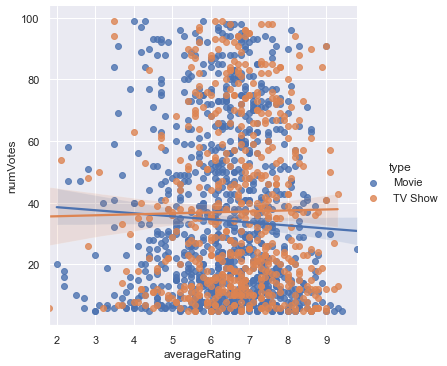

In [115]:
sns.lmplot(x='averageRating',y='numVotes', data=smallVotes, hue="type", height=5)

In [116]:
bigVotes = netflix_df[netflix_df['numVotes'] > 100]
bigVotes

type                  title           director  \
0      TV Show                     3%                NaN   
2        Movie                   7:19  Jorge Michel Grau   
3        Movie                  23:59       Gilbert Chan   
29       Movie                    706      Shravan Kumar   
30       Movie                   1920       Vikram Bhatt   
...        ...                    ...                ...   
23969    Movie                    Zoo       Shlok Sharma   
23992    Movie                   Zoom       Peter Hewitt   
24005    Movie                   Zozo        Josef Fares   
24007    Movie                 Zubaan        Mozez Singh   
24010  TV Show  Zumbo's Just Desserts                NaN   

                                                    cast  \
0      João Miguel, Bianca Comparato, Michel Gomes, R...   
2      Demián Bichir, Héctor Bonilla, Oscar Serrano, ...   
3      Tedd Chan, Stella Chung, Henley Hii, Lawrence ...   
29     Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...   
30     Rajneesh Duggal, Adah Sharma, Indraneil Sengup...   
...                                                  ...   
23969  Shashank Arora, Shweta Tripathi, Rahul Kumar, ...   
23992  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...   
24005  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
24007  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
24010                         Adriano Zumbo, Rachel Khoo   

                                                 country         date_added  \
0                                                 Brazil    August 14, 2020   
2                                                 Mexico  December 23, 2016   
3                                              Singapore  December 20, 2018   
29                                                 India      April 1, 2019   
30                                                 India  December 15, 2017   
...                                                  ...                ...   
23969                                              India       July 1, 2018   
23992                                      United States   January 11, 2020   
24005  Sweden, Czech Republic, United Kingdom, Denmar...   October 19, 2020   
24007                                              India      March 2, 2019   
24010                                          Australia   October 31, 2020   

       release_year rating   duration  \
0              2020  TV-MA  4 Seasons   
2              2016  TV-MA     93 min   
3              2011      R     78 min   
29             2019  TV-14    118 min   
30             2008  TV-MA    143 min   
...             ...    ...        ...   
23969          2018  TV-MA     94 min   
23992          2006     PG     88 min   
24005          2005  TV-MA     99 min   
24007          2015  TV-14    111 min   
24010          2019  TV-PG   1 Season   

                                               listed_in  ... titleType  \
0      International TV Shows, TV Dramas, TV Sci-Fi &...  ...   tvMovie   
2                           Dramas, International Movies  ...     movie   
3                    Horror Movies, International Movies  ...     movie   
29                   Horror Movies, International Movies  ...     movie   
30        Horror Movies, International Movies, Thrillers  ...     movie   
...                                                  ...  ...       ...   
23969   Dramas, Independent Movies, International Movies  ...     short   
23992                 Children & Family Movies, Comedies  ...  tvSeries   
24005                       Dramas, International Movies  ...     movie   
24007     Dramas, International Movies, Music & Musicals  ...     movie   
24010                 International TV Shows, Reality TV  ...  tvSeries   

                primaryTitle          originalTitle isAdult startYear endYear  \
0                         3%                     3%       0      2011      \N   
2                       7:19                   7:19       0    

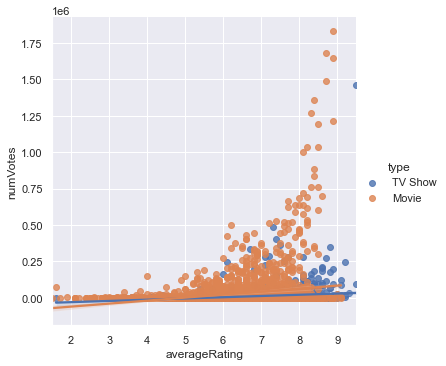

In [117]:
sns.lmplot(x='averageRating',y='numVotes', data=bigVotes, hue="type", height=5)
# change tick values

In [119]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7787 entries, 0 to 24011
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   type            7787 non-null   object 
 1   title           7787 non-null   object 
 2   director        5398 non-null   object 
 3   cast            7069 non-null   object 
 4   country         7280 non-null   object 
 5   date_added      7777 non-null   object 
 6   release_year    7787 non-null   int64  
 7   rating          7780 non-null   object 
 8   duration        7787 non-null   object 
 9   listed_in       7787 non-null   object 
 10  description     7787 non-null   object 
 11  Title           417 non-null    object 
 12  original        7787 non-null   float64
 13  tconst          6197 non-null   object 
 14  titleType       6197 non-null   object 
 15  primaryTitle    6197 non-null   object 
 16  originalTitle   6197 non-null   object 
 17  isAdult         6197 non-null   

In [122]:
smallVotes = netflix_df[netflix_df['numVotes'] < 20]
smallVotes

type        title              director  \
23     TV Show           46           Serdar Akar   
25       Movie          122       Yasir Al Yasiri   
35     TV Show         1983                   NaN   
43     TV Show         1994  Diego Enrique Osorno   
91       Movie  10,000 B.C.       Roland Emmerich   
...        ...          ...                   ...   
23877    Movie         Yuva           Mani Ratnam   
23881  TV Show           Z4                   NaN   
23887    Movie       Zapped         Peter DeLuise   
23961  TV Show   Zoids Wild                   NaN   
23963  TV Show  Zombie Dumb                   NaN   

                                                    cast  \
23     Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...   
25     Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...   
35     Robert Więckiewicz, Maciej Musiał, Michalina O...   
43                                                   NaN   
91     Steven Strait, Camilla Belle, Cliff Curtis, Jo...   
...                                                  ...   
23877  Ajay Devgn, Abhishek Bachchan, Vivek Oberoi, E...   
23881  Apollo Costa, Gabriel Santana, Matheus Lustosa...   
23887  Zendaya, Chanelle Peloso, Spencer Boldman, Emi...   
23961  Kensho Ono, Takahiro Sakurai, Mikako Komatsu, ...   
23963                                                NaN   

                           country         date_added  release_year rating  \
23                          Turkey       July 1, 2017          2016  TV-MA   
25                           Egypt       June 1, 2020          2019  TV-MA   
35           Poland, United States  November 30, 2018          2018  TV-MA   
43                          Mexico       May 17, 2019          2019  TV-MA   
91     United States, South Africa       June 1, 2019          2008  PG-13   
...                            ...                ...           ...    ...   
23877                        India      March 1, 2018          2004  TV-14   
23881                       Brazil  February 22, 2019          2018  TV-PG   
23887        Canada, United States   February 1, 2017          2014   TV-Y   
23961                        Japan    August 14, 2020          2018  TV-Y7   
23963                          NaN       July 1, 2019          2018  TV-Y7   

        duration                                          listed_in  ...  \
23      1 Season    International TV Shows, TV Dramas, TV Mysteries  ...   
25        95 min                Horror Movies, International Movies  ...   
35      1 Season  Crime TV Shows, International TV Shows, TV Dramas  ...   
43      1 Season  Crime TV Shows, Docuseries, International TV S...  ...   
91       109 min                                 Action & Adventure  ...   
...          ...                                                ...  ...   
23877    160 min                       Dramas, International Movies  ...   
23881  2 Seasons                                           Kids' TV  ...   
23887     92 min                 Children & Family Movies, Comedies  ...   
23961   1 Season                             Anime Series, Kids' TV  ...   
23963  2 Seasons             Kids' TV, Korean TV Shows, TV Comedies  ...   

       titleType primaryTitle  originalTitle isAdult startYear endYear  \
23     tvEpisode           46             46       0      1968      \N   
25     tvEpisode          122            122       0      1968      \N   
35     tvEpisode         1983           1983       0      2019      \N   
43         movie         1994           1994       0      1994      \N   
91     tvEpisode  10,000 B.C.    10,000 B.C.       0      2010      \N   
...          ...          ...            ...     ...       ...     ...   
23877      short         Yuva           Yuva       0      2014      \N   
23881   tvSeries           Z4             Z4       0      2018      \N   
23887      short       Zapped         Zapped       0      2004      \N   
23961   tvSeries   Zoids Wild     Zoids Wild       0      2018

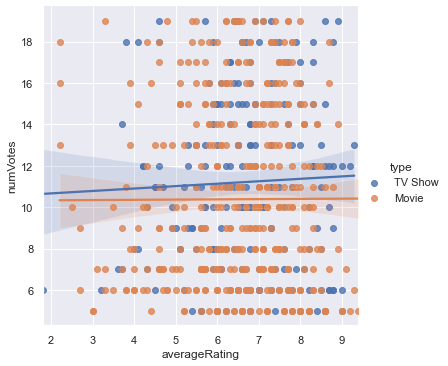

In [123]:
sns.lmplot(x='averageRating',y='numVotes', data=smallVotes, hue="type", height=5)

In [128]:
bigVotes = netflix_df[netflix_df['numVotes'] > 100]
bigVotes

type                  title           director  \
0      TV Show                     3%                NaN   
2        Movie                   7:19  Jorge Michel Grau   
3        Movie                  23:59       Gilbert Chan   
29       Movie                    706      Shravan Kumar   
30       Movie                   1920       Vikram Bhatt   
...        ...                    ...                ...   
23969    Movie                    Zoo       Shlok Sharma   
23992    Movie                   Zoom       Peter Hewitt   
24005    Movie                   Zozo        Josef Fares   
24007    Movie                 Zubaan        Mozez Singh   
24010  TV Show  Zumbo's Just Desserts                NaN   

                                                    cast  \
0      João Miguel, Bianca Comparato, Michel Gomes, R...   
2      Demián Bichir, Héctor Bonilla, Oscar Serrano, ...   
3      Tedd Chan, Stella Chung, Henley Hii, Lawrence ...   
29     Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...   
30     Rajneesh Duggal, Adah Sharma, Indraneil Sengup...   
...                                                  ...   
23969  Shashank Arora, Shweta Tripathi, Rahul Kumar, ...   
23992  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...   
24005  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
24007  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
24010                         Adriano Zumbo, Rachel Khoo   

                                                 country         date_added  \
0                                                 Brazil    August 14, 2020   
2                                                 Mexico  December 23, 2016   
3                                              Singapore  December 20, 2018   
29                                                 India      April 1, 2019   
30                                                 India  December 15, 2017   
...                                                  ...                ...   
23969                                              India       July 1, 2018   
23992                                      United States   January 11, 2020   
24005  Sweden, Czech Republic, United Kingdom, Denmar...   October 19, 2020   
24007                                              India      March 2, 2019   
24010                                          Australia   October 31, 2020   

       release_year rating   duration  \
0              2020  TV-MA  4 Seasons   
2              2016  TV-MA     93 min   
3              2011      R     78 min   
29             2019  TV-14    118 min   
30             2008  TV-MA    143 min   
...             ...    ...        ...   
23969          2018  TV-MA     94 min   
23992          2006     PG     88 min   
24005          2005  TV-MA     99 min   
24007          2015  TV-14    111 min   
24010          2019  TV-PG   1 Season   

                                               listed_in  ... titleType  \
0      International TV Shows, TV Dramas, TV Sci-Fi &...  ...   tvMovie   
2                           Dramas, International Movies  ...     movie   
3                    Horror Movies, International Movies  ...     movie   
29                   Horror Movies, International Movies  ...     movie   
30        Horror Movies, International Movies, Thrillers  ...     movie   
...                                                  ...  ...       ...   
23969   Dramas, Independent Movies, International Movies  ...     short   
23992                 Children & Family Movies, Comedies  ...  tvSeries   
24005                       Dramas, International Movies  ...     movie   
24007     Dramas, International Movies, Music & Musicals  ...     movie   
24010                 International TV Shows, Reality TV  ...  tvSeries   

                primaryTitle          originalTitle isAdult startYear endYear  \
0                         3%                     3%       0      2011      \N   
2                       7:19                   7:19       0    

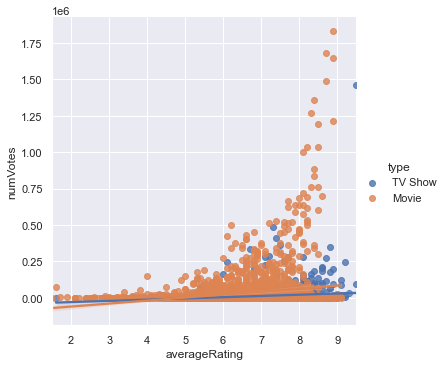

In [129]:
sns.lmplot(x='averageRating',y='numVotes', data=bigVotes, hue="type", height=5)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

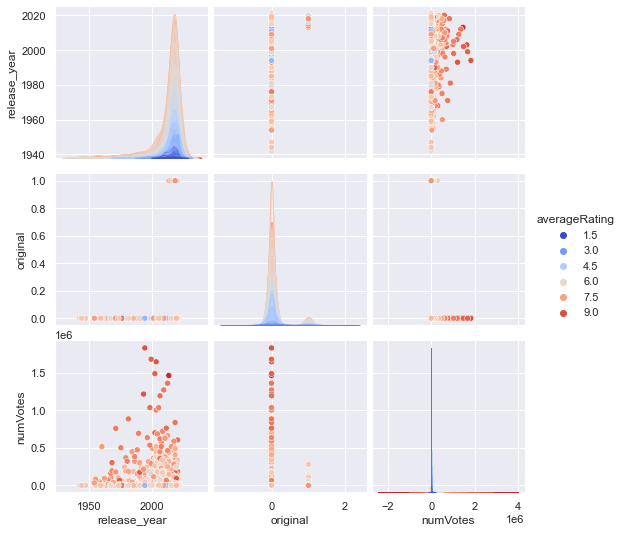

In [130]:
sns.pairplot(netflix_df, hue='averageRating',palette='coolwarm')

In [131]:
netflix_df.corr()

release_year  original  averageRating  numVotes
release_year       1.000000  0.122537      -0.057816 -0.193467
original           0.122537  1.000000      -0.019933 -0.026495
averageRating     -0.057816 -0.019933       1.000000  0.155679
numVotes          -0.193467 -0.026495       0.155679  1.000000

<AxesSubplot:>

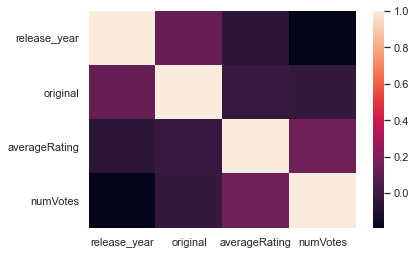

In [132]:
sns.heatmap(netflix_df.corr())

<AxesSubplot:>

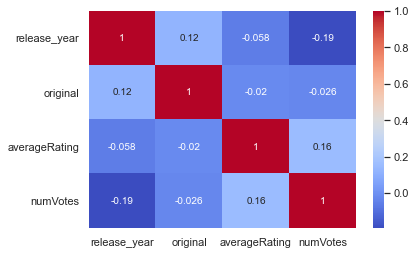

In [133]:
sns.heatmap(netflix_df.corr(),cmap='coolwarm',annot=True)

<AxesSubplot:xlabel='release_year', ylabel='rating'>

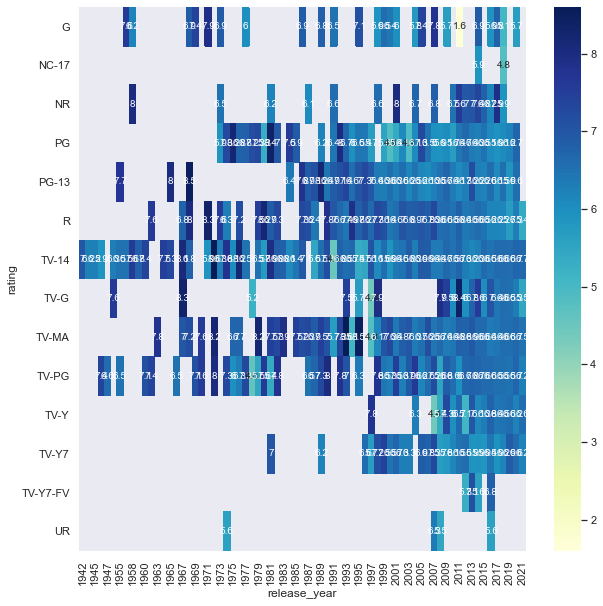

In [145]:
a = netflix_df.pivot_table(values='averageRating',index = "rating", columns='release_year')

fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(a, cmap="YlGnBu", annot=True)

<AxesSubplot:xlabel='release_year', ylabel='original'>

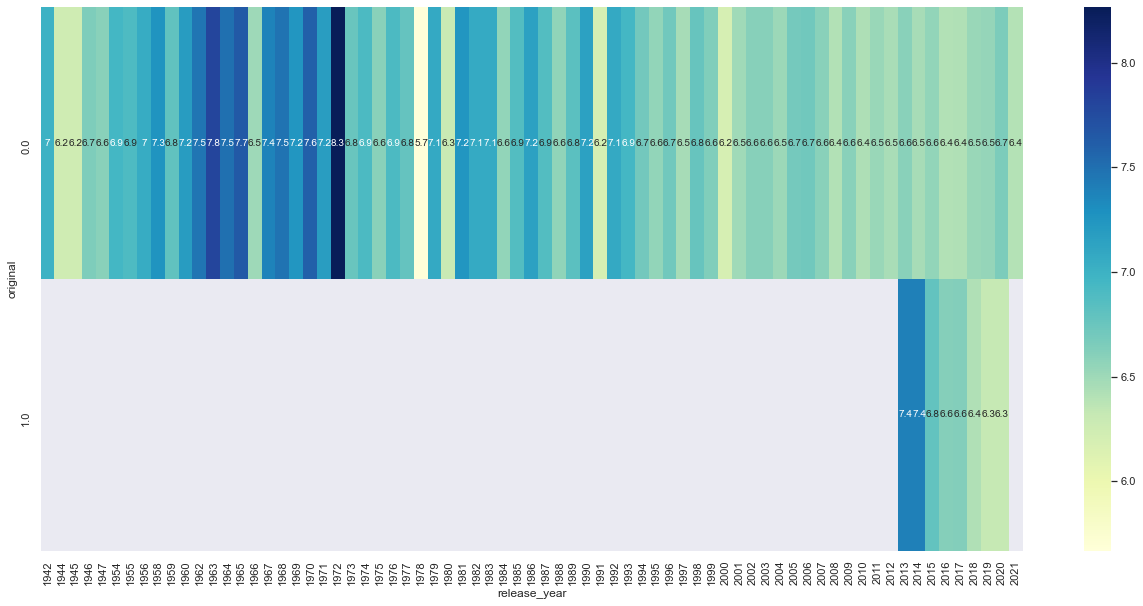

In [149]:
a = netflix_df.pivot_table(values='averageRating',index = "original", columns='release_year')

fig, ax = plt.subplots(figsize=(22,10)) 
sns.heatmap(a, cmap="YlGnBu", annot=True)

<AxesSubplot:xlabel='release_year', ylabel='type'>

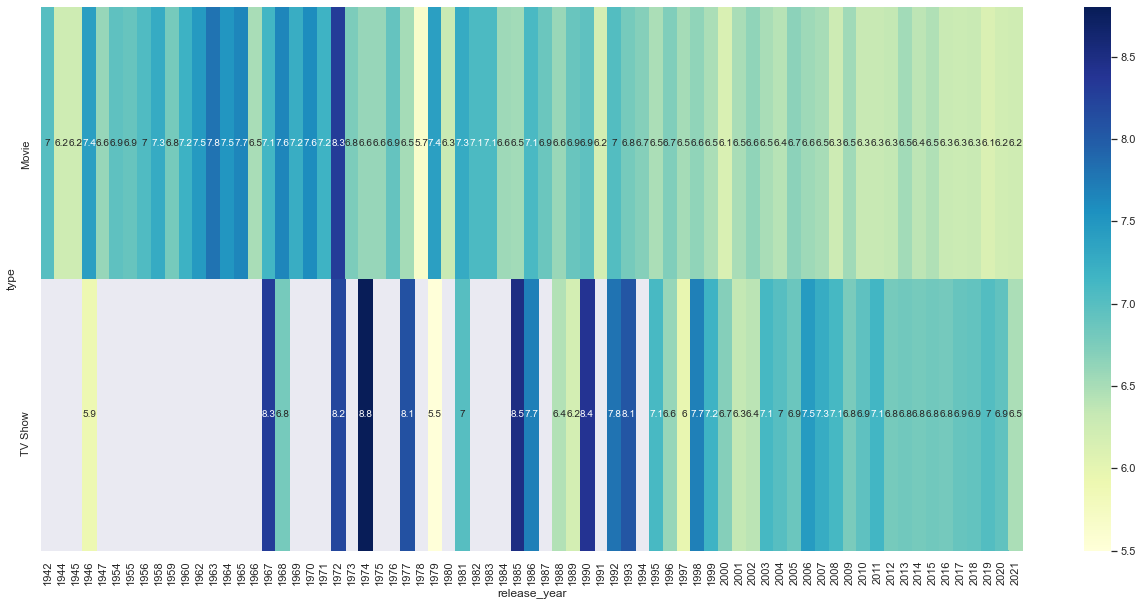

In [150]:
a = netflix_df.pivot_table(values='averageRating',index = "type", columns='release_year')

fig, ax = plt.subplots(figsize=(22,10)) 
sns.heatmap(a, cmap="YlGnBu", annot=True)

<AxesSubplot:xlabel='duration', ylabel='type'>

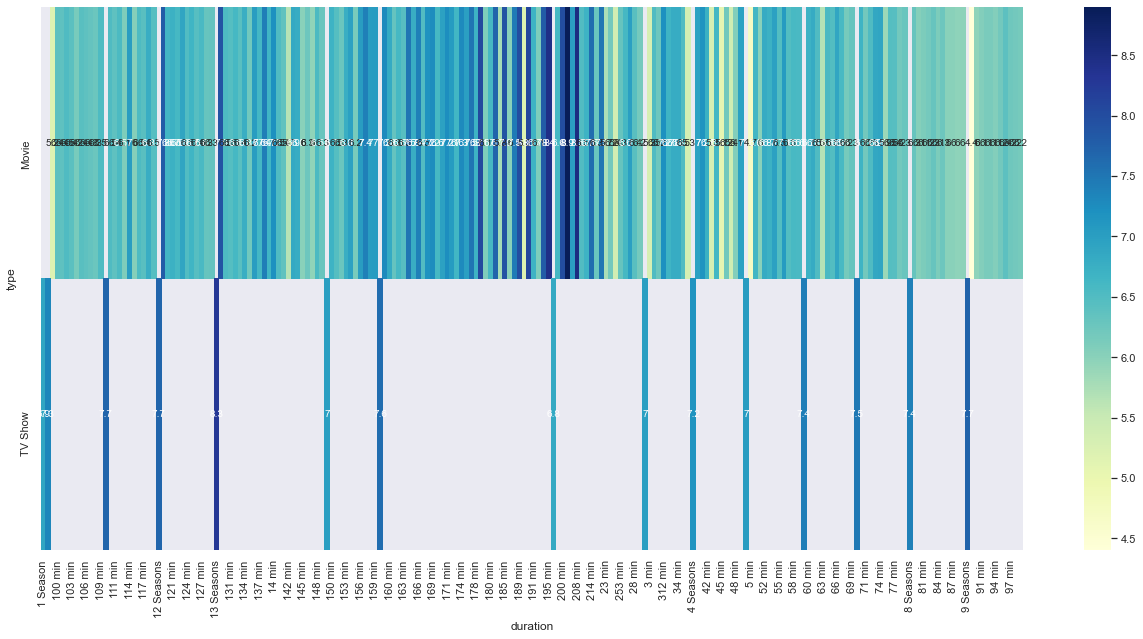

In [151]:
a = netflix_df.pivot_table(values='averageRating',index = "type", columns='duration')

fig, ax = plt.subplots(figsize=(22,10)) 
sns.heatmap(a, cmap="YlGnBu", annot=True)

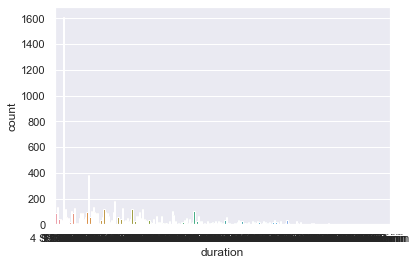

In [154]:
# exclude seasons that appear only a few times
sns.countplot(x='duration', data=netflix_df);

In [158]:
# https://stackoverflow.com/questions/16330831/most-efficient-way-to-find-mode-in-numpy-array
sns.barplot(x='duration',y='averageRating',data=netflix_df, estimator = stats.mode(netflix_df))

TypeError: 'ModeResult' object is not callable

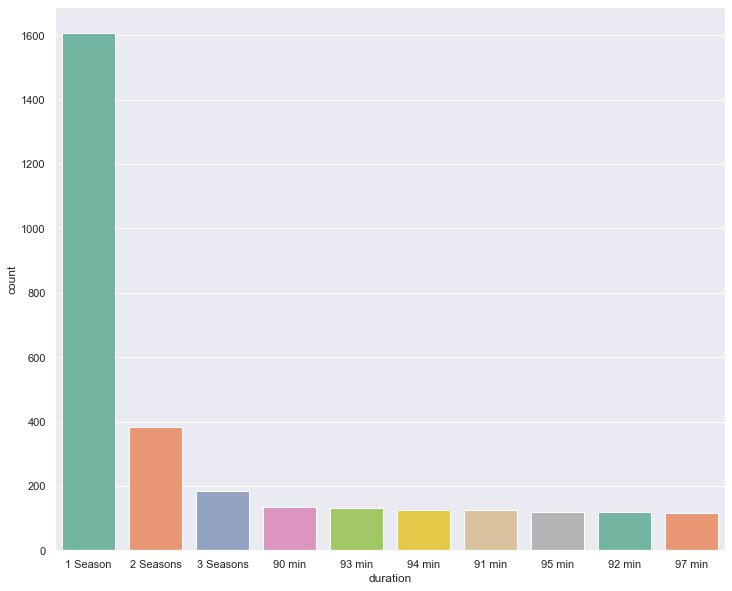

In [159]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="duration", data=netflix_df, palette="Set2", \
                   order=netflix_df['duration'].value_counts().index[0:10])

In [200]:
# smallVotes = netflix_df[netflix_df['numVotes'] < 100]
# df.loc[df['column_name'] != some_value]
duration_filter = netflix_df['duration'].value_counts().nlargest(10).index
duration_filter

Index(['1 Season', '2 Seasons', '3 Seasons', '90 min', '93 min', '94 min',
       '91 min', '95 min', '92 min', '97 min'],
      dtype='object')

In [201]:
# https://stackoverflow.com/questions/12096252/use-a-list-of-values-to-select-rows-from-a-pandas-dataframe
# https://blog.softhints.com/pandas-how-to-filter-results-of-value_counts/
filtered_duration = netflix_df[netflix_df['duration'].isin(duration_filter)]
filtered_duration

type                                    title              director  \
2        Movie                                     7:19     Jorge Michel Grau   
23     TV Show                                       46           Serdar Akar   
25       Movie                                      122       Yasir Al Yasiri   
35     TV Show                                     1983                   NaN   
43     TV Show                                     1994  Diego Enrique Osorno   
...        ...                                      ...                   ...   
23963  TV Show                              Zombie Dumb                   NaN   
23968  TV Show                                Zona Rosa                   NaN   
23969    Movie                                      Zoo          Shlok Sharma   
24010  TV Show                    Zumbo's Just Desserts                   NaN   
24011    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS              Sam Dunn   

                                                    cast  \
2      Demián Bichir, Héctor Bonilla, Oscar Serrano, ...   
23     Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...   
25     Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...   
35     Robert Więckiewicz, Maciej Musiał, Michalina O...   
43                                                   NaN   
...                                                  ...   
23963                                                NaN   
23968  Manu NNa, Ana Julia Yeyé, Ray Contreras, Pablo...   
23969  Shashank Arora, Shweta Tripathi, Rahul Kumar, ...   
24010                         Adriano Zumbo, Rachel Khoo   
24011                                                NaN   

                                     country         date_added  release_year  \
2                                     Mexico  December 23, 2016          2016   
23                                    Turkey       July 1, 2017          2016   
25                                     Egypt       June 1, 2020          2019   
35                     Poland, United States  November 30, 2018          2018   
43                                    Mexico       May 17, 2019          2019   
...                                      ...                ...           ...   
23963                                    NaN       July 1, 2019          2018   
23968                                 Mexico  November 26, 2019          2019   
23969                                  India       July 1, 2018          2018   
24010                              Australia   October 31, 2020          2019   
24011  United Kingdom, Canada, United States      March 1, 2020          2019   

      rating   duration                                          listed_in  \
2      TV-MA     93 min                       Dramas, International Movies   
23     TV-MA   1 Season    International TV Shows, TV Dramas, TV Mysteries   
25     TV-MA     95 min                Horror Movies, International Movies   
35     TV-MA   1 Season  Crime TV Shows, International TV Shows, TV Dramas   
43     TV-MA   1 Season  Crime TV Shows, Docuseries, International TV S...   
...      ...        ...                                                ...   
23963  TV-Y7  2 Seasons             Kids' TV, Korean TV Shows, TV Comedies   
23968  TV-MA   1 Season  International TV Shows, Spanish-Language TV Sh...   
23969  TV-MA     94 min   Dramas, Independent Movies, International Movies   
24010  TV-PG   1 Season                 International TV Shows, Reality TV   
24011  TV-MA     90 min                    Documentaries, Music & Musicals   

       ...  titleType           primaryTitle          originalTitle isAdult  \
2      ...      movie                   7:19                   7:19       0   
23     ...  tvEpisode                     46                     46       0   
25     ...  tvEpisode                    122                    122       0   
35     ...  tvEpisode                   1983                   1983       0   
43     ... 

<AxesSubplot:xlabel='duration', ylabel='type'>

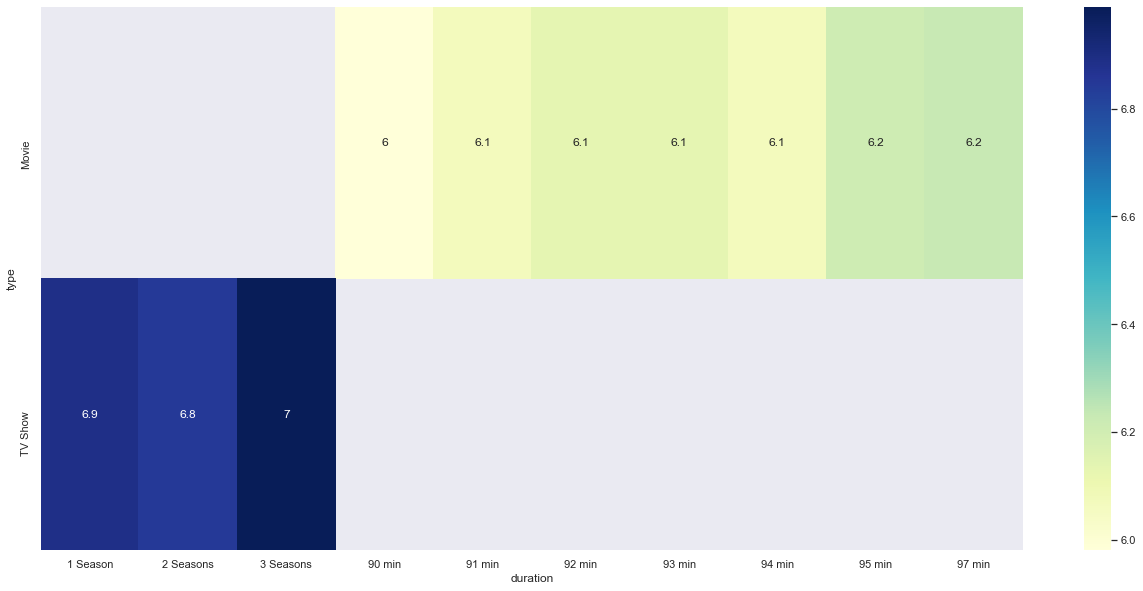

In [202]:
# https://stackoverflow.com/questions/38913965/make-the-size-of-a-heatmap-bigger-with-seaborn
a = filtered_duration.pivot_table(values='averageRating',index = "type", columns='duration')

fig, ax = plt.subplots(figsize=(22,10)) 
sns.heatmap(a, cmap="YlGnBu", annot=True)

In [212]:
director_filter = netflix_df['director'].value_counts().nlargest(9).index
director_filter

Index(['Raúl Campos, Jan Suter', 'Marcus Raboy', 'Jay Karas',
       'Cathy Garcia-Molina', 'Jay Chapman', 'Youssef Chahine',
       'Martin Scorsese', 'Steven Spielberg', 'David Dhawan'],
      dtype='object')

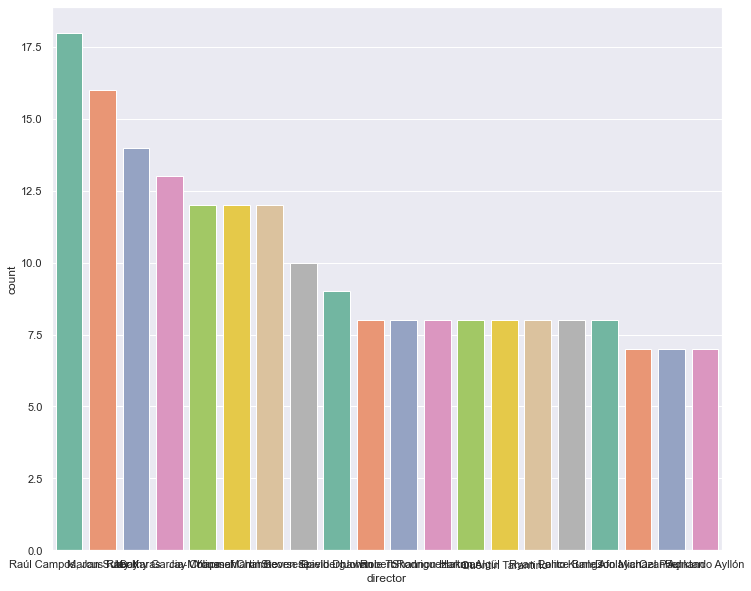

In [211]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="director", data=netflix_df, palette="Set2", \
                   order=netflix_df['director'].value_counts().index[0:20])

In [214]:
filtered_director = netflix_df[netflix_df['director'].isin(director_filter)]
filtered_director

type                                title                director  \
378    Movie                      A Second Chance     Cathy Garcia-Molina   
434    Movie                  A Very Special Love     Cathy Garcia-Molina   
538    Movie  Adam Devine: Best Time of Our Lives               Jay Karas   
791    Movie       Alan Saldaña: Mi vida de pobre  Raúl Campos, Jan Suter   
803    Movie                  Alexandria ... Why?         Youssef Chahine   
...      ...                                  ...                     ...   
22993  Movie                   Vir Das: Losing It            Marcus Raboy   
23209  Movie                            War Horse        Steven Spielberg   
23591  Movie    Whitney Cummings: Can I Touch It?            Marcus Raboy   
23597  Movie      Who's That Knocking at My Door?         Martin Scorsese   
23840  Movie                  You Changed My Life     Cathy Garcia-Molina   

                                                    cast  \
378    John Lloyd Cruz, Bea Alonzo, Dimples Romana, J...   
434    John Lloyd Cruz, Sarah Geronimo, Dante Rivero,...   
538                                          Adam Devine   
791                                         Alan Saldaña   
803    Naglaa Fathi, Farid Shawqy, Mohsen Mohiedine, ...   
...                                                  ...   
22993                                            Vir Das   
23209  Emily Watson, David Thewlis, Peter Mullan, Nie...   
23591                                   Whitney Cummings   
23597  Zina Bethune, Harvey Keitel, Anne Collette, Le...   
23840  John Lloyd Cruz, Sarah Geronimo, Rayver Cruz, ...   

                    country         date_added  release_year rating duration  \
378             Philippines  February 27, 2019          2015  TV-MA  130 min   
434             Philippines  November 12, 2020          2008   TV-G  107 min   
538           United States      June 18, 2019          2019  TV-MA   59 min   
791                  Mexico     August 4, 2017          2017  TV-MA   54 min   
803          Egypt, Algeria      June 18, 2020          1979  TV-MA  131 min   
...                     ...                ...           ...    ...      ...   
22993         United States  December 11, 2018          2018  TV-MA   68 min   
23209  United States, India        May 6, 2019          2011  PG-13  147 min   
23591                   NaN      July 30, 2019          2019  TV-MA   59 min   
23597         United States       July 1, 2019          1967      R   90 min   
23840           Philippines  February 27, 2019          2009  TV-PG  116 min   

                                           listed_in  ...  titleType  \
378    Dramas, International Movies, Romantic Movies  ...      movie   
434            International Movies, Romantic Movies  ...      movie   
538                                  Stand-Up Comedy  ...  tvSpecial   
791                                  Stand-Up Comedy  ...  tvSpecial   
803     Classic Movies, Dramas, International Movies  ...        NaN   
...                                              ...  ...        ...   
22993                                Stand-Up Comedy  ...  tvSpecial   
23209                                         Dramas  ...  tvEpisode   
23591                                Stand-Up Comedy  ...  tvSpecial   
23597     Classic Movies, Dramas, Independent Movies  ...      movie   
23840         Comedies, Dramas, International Movies  ...      movie   

                              primaryTitle  \
378                        A Second Chance   
434                    A Very Special Love   
538    Adam Devine: Best Time of Our Lives   
791         Alan Saldaña: Mi vida de pobre   
803                                    NaN   
...                                    ...   
22993                   Vir Das: Losing It   
23209                            War Horse   
23591    Whitney Cummings: Can I Touch It?   
23597      Who's That Knocking at My Door?   
23840                  You Cha

<AxesSubplot:xlabel='director', ylabel='original'>

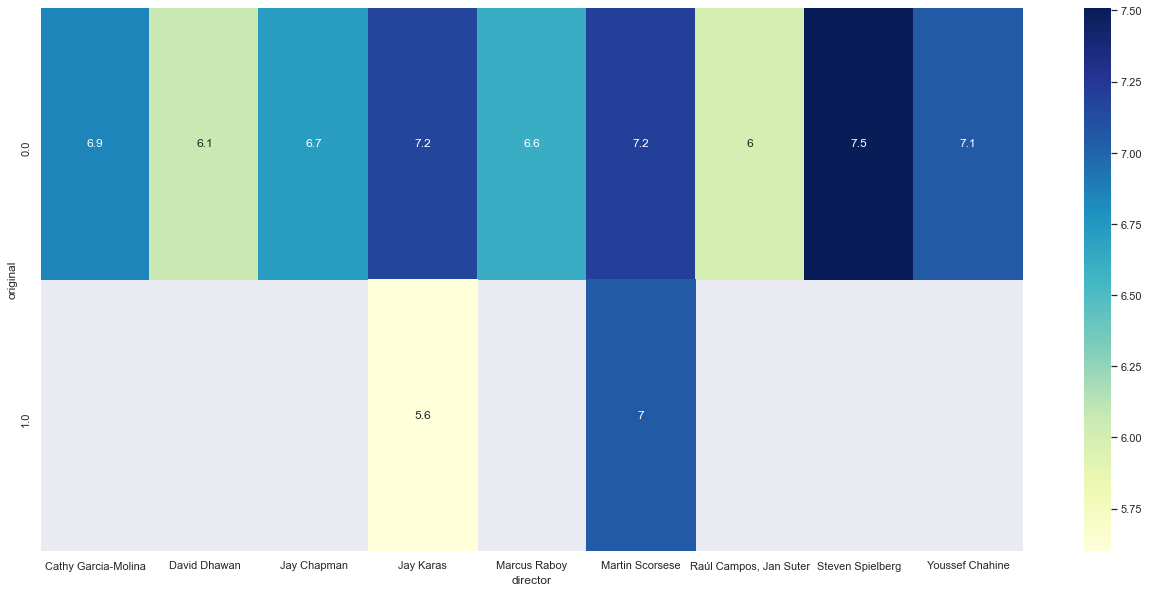

In [216]:
a = filtered_director.pivot_table(values='averageRating',index = "original", columns='director')

fig, ax = plt.subplots(figsize=(22,10)) 
sns.heatmap(a, cmap="YlGnBu", annot=True)

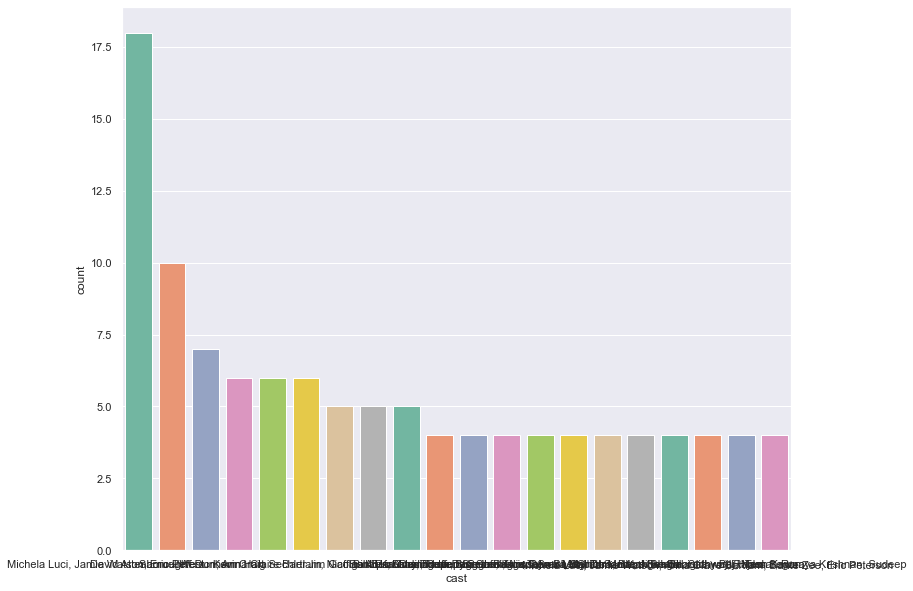

In [217]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="cast", data=netflix_df, palette="Set2", \
                   order=netflix_df['cast'].value_counts().index[0:20])

In [218]:
cast_filter = netflix_df['cast'].value_counts().nlargest(10).index
cast_filter

Index(['David Attenborough', 'Samuel West', 'Jeff Dunham', 'Kevin Hart',
       'Craig Sechler',
       'Michela Luci, Jamie Watson, Eric Peterson, Anna Claire Bartlam, Nicolas Aqui, Cory Doran, Julie Lemieux, Derek McGrath',
       'Jim Gaffigan', 'Bill Burr', 'Iliza Shlesinger', 'Jim Jefferies'],
      dtype='object')

In [219]:
filtered_cast = netflix_df[netflix_df['cast'].isin(cast_filter)]
filtered_cast

type                                   title         director  \
585    TV Show                                  Africa              NaN   
2126     Movie  Bill Burr: I'm Sorry You Feel That Way        Jay Karas   
2127     Movie                    Bill Burr: Let It Go  Shannon Hartman   
2128     Movie                  Bill Burr: Paper Tiger      Mike Binder   
2129     Movie            Bill Burr: Walk Your Way Out        Jay Karas   
...        ...                                     ...              ...   
22465    Movie              True: Grabbleapple Harvest              NaN   
22468    Movie                    True: Rainbow Rescue              NaN   
22469  TV Show                    True: Terrific Tales              NaN   
22470    Movie                  True: Tricky Treat Day              NaN   
22471    Movie                     True: Winter Wishes              NaN   

                                                    cast  \
585                                   David Attenborough   
2126                                           Bill Burr   
2127                                           Bill Burr   
2128                                           Bill Burr   
2129                                           Bill Burr   
...                                                  ...   
22465  Michela Luci, Jamie Watson, Eric Peterson, Ann...   
22468  Michela Luci, Jamie Watson, Eric Peterson, Ann...   
22469  Michela Luci, Jamie Watson, Eric Peterson, Ann...   
22470  Michela Luci, Jamie Watson, Eric Peterson, Ann...   
22471  Michela Luci, Jamie Watson, Eric Peterson, Ann...   

                             country          date_added  release_year rating  \
585                   United Kingdom      April 28, 2016          2013  TV-PG   
2126                   United States    December 5, 2014          2014  TV-MA   
2127                   United States   November 10, 2017          2010     NR   
2128   United States, United Kingdom  September 10, 2019          2019  TV-MA   
2129                   United States    January 31, 2017          2017  TV-MA   
...                              ...                 ...           ...    ...   
22465                         Canada    November 1, 2019          2019   TV-Y   
22468                         Canada        June 2, 2020          2020   TV-Y   
22469                         Canada        May 12, 2020          2020   TV-Y   
22470                         Canada  September 20, 2019          2019   TV-Y   
22471                            NaN   November 26, 2019          2019   TV-Y   

       duration                                          listed_in  ...  \
585    1 Season  British TV Shows, Docuseries, International TV...  ...   
2126     81 min                                    Stand-Up Comedy  ...   
2127     65 min                                    Stand-Up Comedy  ...   
2128     67 min                                    Stand-Up Comedy  ...   
2129     78 min                                    Stand-Up Comedy  ...   
...         ...                                                ...  ...   
22465    24 min                           Children & Family Movies  ...   
22468    24 min                                             Movies  ...   
22469  1 Season                                           Kids' TV  ...   
22470    24 min                           Children & Family Movies  ...   
22471    46 min                           Children & Family Movies  ...   

       titleType                            primaryTitle  \
585        short                                  Africa   
2126   tvSpecial  Bill Burr: I'm Sorry You Feel That Way   
2127   tvSpecial                    Bill Burr: Let It Go   
2128   tvSpecial                  Bill Burr: Paper Tiger   
2129   tvSpecial            Bill Burr: Walk Your Way Out   
...          ...                                     ...   
22465        NaN                                     NaN   
22468  tvSpecial                  

<AxesSubplot:xlabel='cast', ylabel='original'>

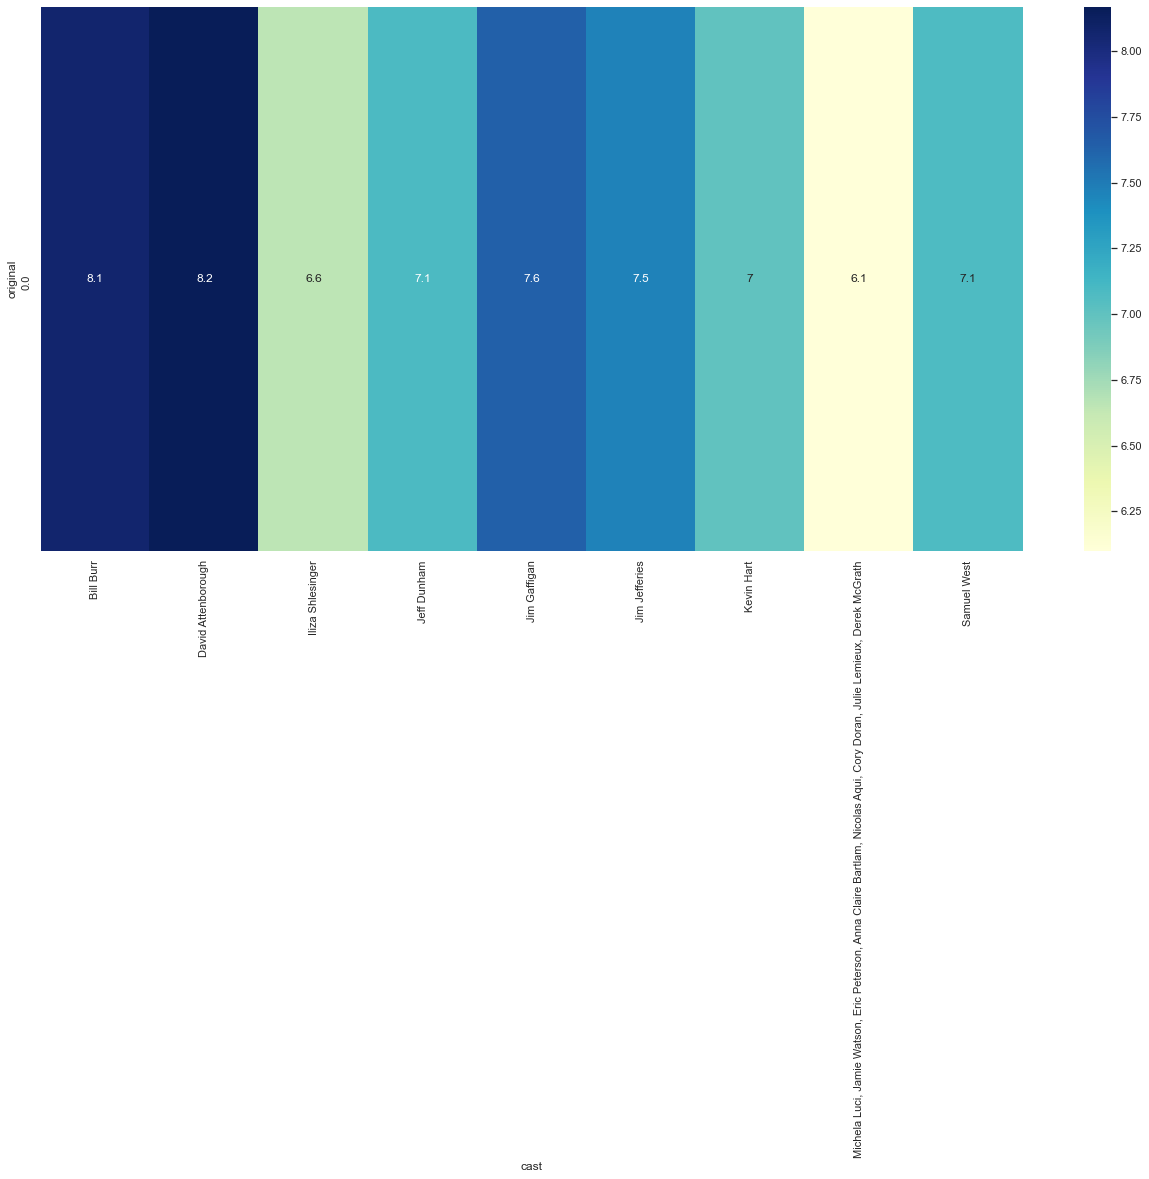

In [220]:
a = filtered_cast.pivot_table(values='averageRating',index = "original", columns='cast')

fig, ax = plt.subplots(figsize=(22,10)) 
sns.heatmap(a, cmap="YlGnBu", annot=True)

<AxesSubplot:xlabel='cast', ylabel='type'>

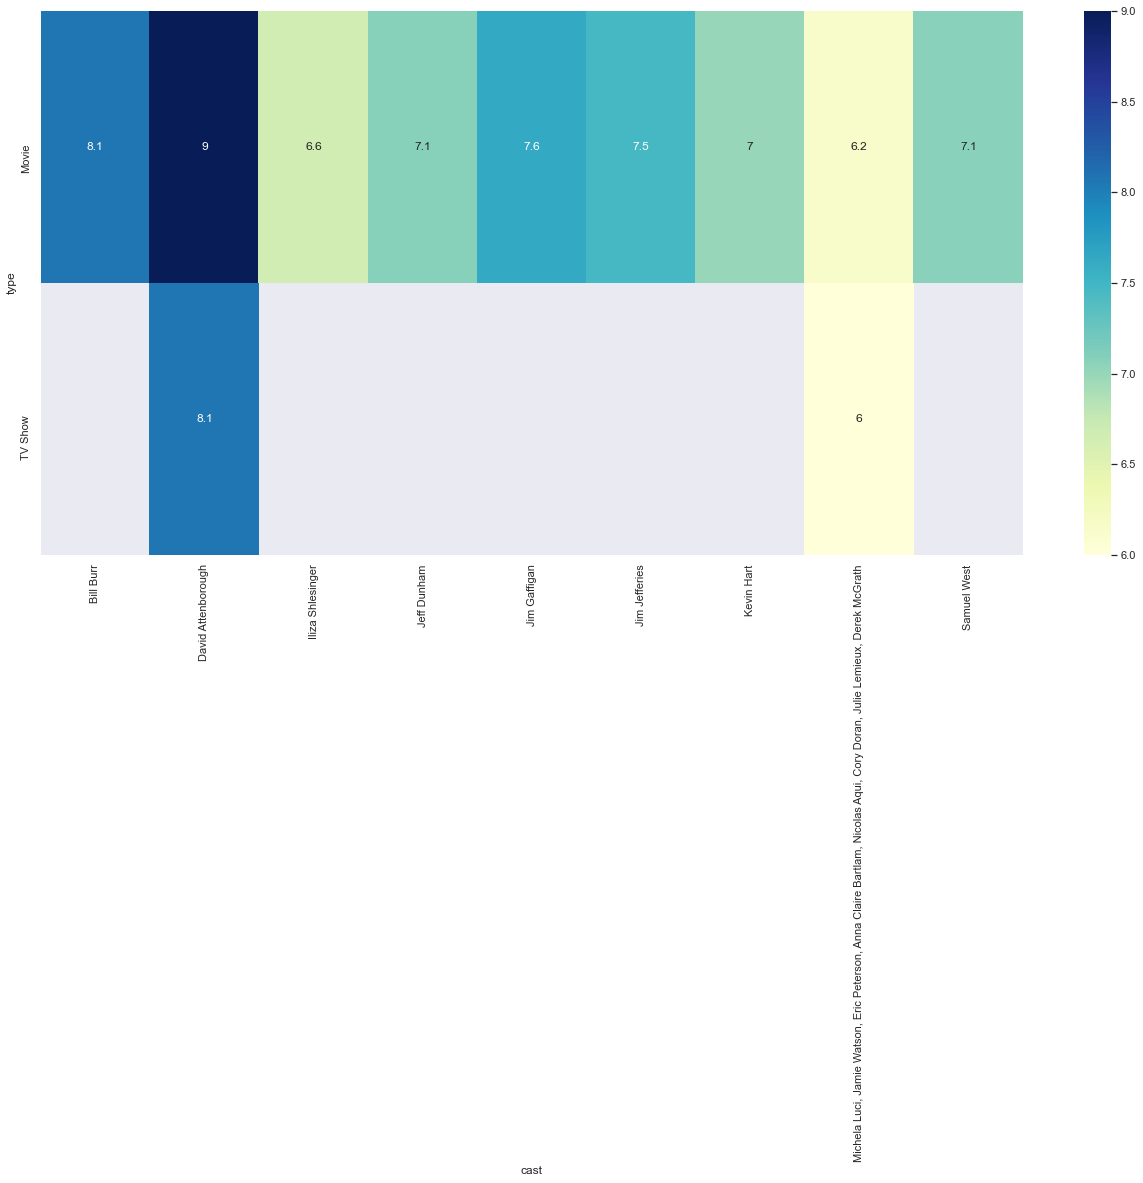

In [222]:
a = filtered_cast.pivot_table(values='averageRating',index = "type", columns='cast')

fig, ax = plt.subplots(figsize=(22,10)) 
sns.heatmap(a, cmap="YlGnBu", annot=True)

<AxesSubplot:xlabel='cast', ylabel='averageRating'>

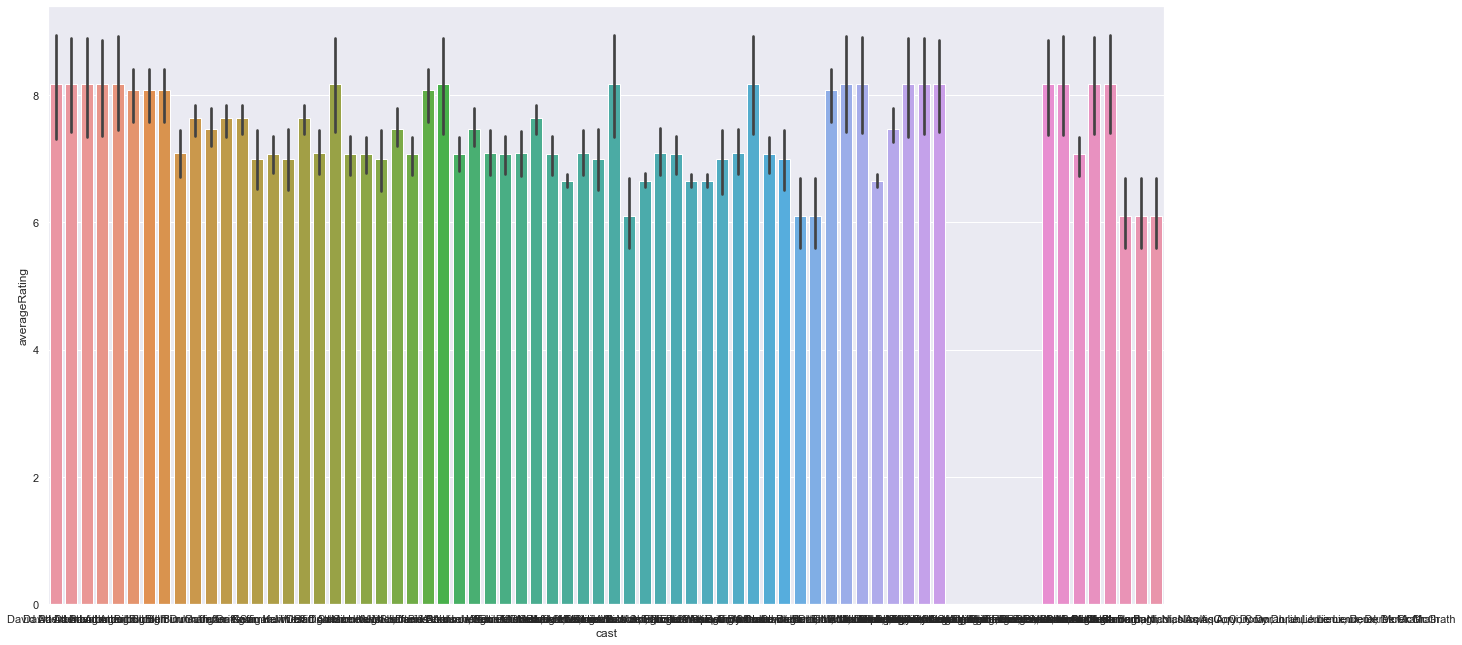

In [247]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 11)
result = filtered_cast.reset_index().sort_values('averageRating', ascending = False)
sns.barplot(x='cast',y='averageRating',data=filtered_cast, order=result['cast'])

In [246]:
# result = a.groupby(["Id"])['Speed'].aggregate(np.median).reset_index().sort_values('Speed')
test = filtered_cast.reset_index().sort_values('averageRating', ascending = False)
test['cast']

51                                   David Attenborough
6                                    David Attenborough
49                                   David Attenborough
7                                    David Attenborough
8                                    David Attenborough
                            ...                        
63                                   David Attenborough
65                                   David Attenborough
67    Michela Luci, Jamie Watson, Eric Peterson, Ann...
70    Michela Luci, Jamie Watson, Eric Peterson, Ann...
71    Michela Luci, Jamie Watson, Eric Peterson, Ann...
Name: cast, Length: 72, dtype: object

<AxesSubplot:xlabel='averageRating', ylabel='Density'>

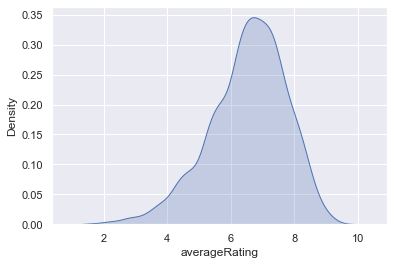

In [249]:
sns.set(style="darkgrid")
sns.kdeplot(data=netflix_df['averageRating'], shade=True)

In [253]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7787 entries, 0 to 24011
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   type            7787 non-null   object 
 1   title           7787 non-null   object 
 2   director        5398 non-null   object 
 3   cast            7069 non-null   object 
 4   country         7280 non-null   object 
 5   date_added      7777 non-null   object 
 6   release_year    7787 non-null   int64  
 7   rating          7780 non-null   object 
 8   duration        7787 non-null   object 
 9   listed_in       7787 non-null   object 
 10  description     7787 non-null   object 
 11  Title           417 non-null    object 
 12  original        7787 non-null   float64
 13  tconst          6197 non-null   object 
 14  titleType       6197 non-null   object 
 15  primaryTitle    6197 non-null   object 
 16  originalTitle   6197 non-null   object 
 17  isAdult         6197 non-null   

In [259]:
# https://re-thought.com/creating-wordclouds-in-python/
text = " ".join(genre for genre in netflix_df['listed_in'].astype(str))
text
# text = " ".join(genre for genre in netflix_df['listed_in'].astype(str))
# print ("There are {} words in the combination of all cells in column listed_in.".format(len(text)))
# print(text)

"International TV Shows, TV Dramas, TV Sci-Fi & Fantasy Dramas, International Movies Horror Movies, International Movies Action & Adventure, Independent Movies, Sci-Fi & Fantasy Dramas International TV Shows, TV Dramas, TV Mysteries Horror Movies, International Movies Dramas Horror Movies, International Movies Horror Movies, International Movies, Thrillers Dramas, Thrillers Crime TV Shows, International TV Shows, TV Dramas Crime TV Shows, Docuseries, International TV Shows Documentaries, International Movies, Sports Movies Independent Movies, Sci-Fi & Fantasy, Thrillers Dramas, International Movies, Thrillers International TV Shows, TV Dramas Dramas, Thrillers Comedies, Dramas, Independent Movies Sports Movies Dramas, Independent Movies, International Movies Action & Adventure, Dramas, International Movies Dramas, International Movies Dramas, International Movies Anime Series, International TV Shows Documentaries Reality TV Horror Movies, International Movies, Thrillers Documentaries, 

In [269]:
text = [word for word in netflix_df['listed_in']]
text

['International TV Shows, TV Dramas, TV Sci-Fi & Fantasy',
 'Dramas, International Movies',
 'Horror Movies, International Movies',
 'Action & Adventure, Independent Movies, Sci-Fi & Fantasy',
 'Dramas',
 'International TV Shows, TV Dramas, TV Mysteries',
 'Horror Movies, International Movies',
 'Dramas',
 'Horror Movies, International Movies',
 'Horror Movies, International Movies, Thrillers',
 'Dramas, Thrillers',
 'Crime TV Shows, International TV Shows, TV Dramas',
 'Crime TV Shows, Docuseries, International TV Shows',
 'Documentaries, International Movies, Sports Movies',
 'Independent Movies, Sci-Fi & Fantasy, Thrillers',
 'Dramas, International Movies, Thrillers',
 'International TV Shows, TV Dramas',
 'Dramas, Thrillers',
 'Comedies, Dramas, Independent Movies',
 'Sports Movies',
 'Dramas, Independent Movies, International Movies',
 'Action & Adventure, Dramas, International Movies',
 'Dramas, International Movies',
 'Dramas, International Movies',
 'Anime Series, International

In [274]:
str(netflix_df['description'])

"0        In a future where the elite inhabit an island ...\n2        After a devastating earthquake hits Mexico Cit...\n3        When an army recruit is found dead, his fellow...\n4        In a postapocalyptic world, rag-doll robots hi...\n14       A brilliant group of students become card-coun...\n                               ...                        \n24005    When Lebanon's Civil War deprives Zozo of his ...\n24007    A scrappy but poor boy worms his way into a ty...\n24009    In this documentary, South African rapper Nast...\n24010    Dessert wizard Adriano Zumbo looks for the nex...\n24011    This documentary delves into the mystique behi...\nName: description, Length: 7787, dtype: object"

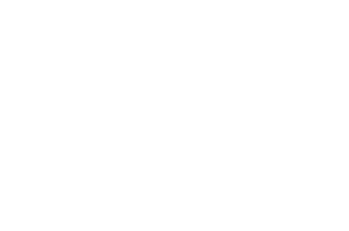

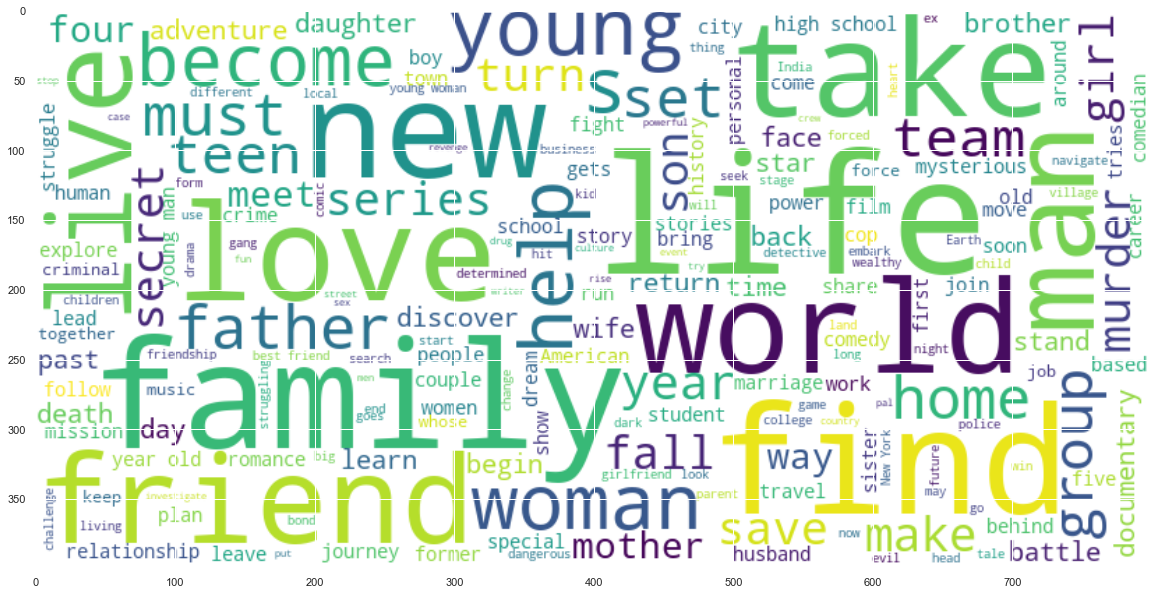

In [297]:
# https://stackoverflow.com/questions/53997443/how-to-add-extra-stop-words-in-addition-to-default-stopwords-in-wordcloud
    
text = " ".join(word for word in netflix_df['description'].astype(str))

stop_words = ["one", "two", "three"] + list(STOPWORDS)

wordcloud = WordCloud(stopwords=stop_words, background_color="white", width=800, height=400).generate(text)

plt.axis("off")
plt.figure( figsize=(20,20))
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

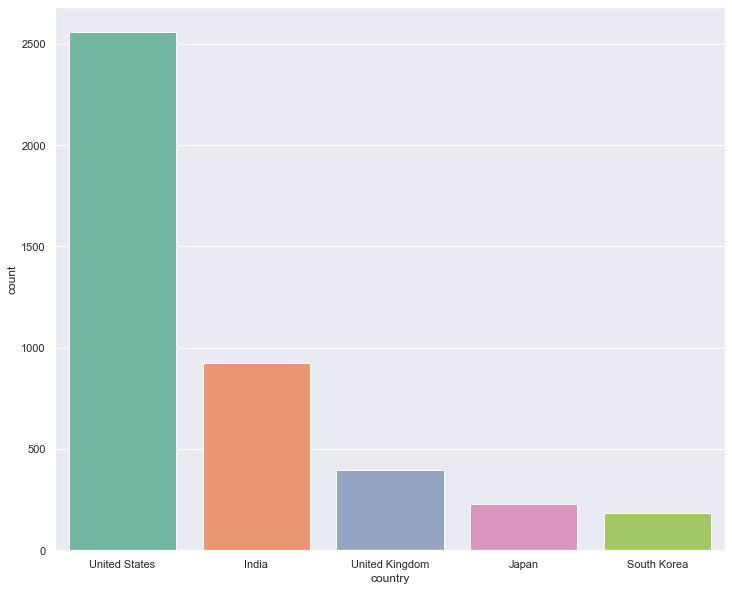

In [310]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="country", data=netflix_df, palette="Set2", order=netflix_df['country'].value_counts().index[0:5])

In [312]:
country_filter = netflix_df['country'].value_counts().nlargest(5).index
country_filter

Index(['United States', 'India', 'United Kingdom', 'Japan', 'South Korea'], dtype='object')

In [313]:
filtered_country = netflix_df[netflix_df['country'].isin(country_filter)]
filtered_country

type       title          director  \
4      Movie           9       Shane Acker   
14     Movie          21    Robert Luketic   
28     Movie         187    Kevin Reynolds   
29     Movie         706     Shravan Kumar   
30     Movie        1920      Vikram Bhatt   
...      ...         ...               ...   
23962  Movie    Zokkomon  Satyajit Bhatkal   
23964  Movie  Zombieland   Ruben Fleischer   
23969  Movie         Zoo      Shlok Sharma   
23992  Movie        Zoom      Peter Hewitt   
24007  Movie      Zubaan       Mozez Singh   

                                                    cast        country  \
4      Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
14     Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   
28     Samuel L. Jackson, John Heard, Kelly Rowan, Cl...  United States   
29     Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...          India   
30     Rajneesh Duggal, Adah Sharma, Indraneil Sengup...          India   
...                                                  ...            ...   
23962  Darsheel Safary, Anupam Kher, Manjari Fadnis, ...          India   
23964  Jesse Eisenberg, Woody Harrelson, Emma Stone, ...  United States   
23969  Shashank Arora, Shweta Tripathi, Rahul Kumar, ...          India   
23992  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...  United States   
24007  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...          India   

              date_added  release_year rating duration  \
4      November 16, 2017          2009  PG-13   80 min   
14       January 1, 2020          2008  PG-13  123 min   
28      November 1, 2019          1997      R  119 min   
29         April 1, 2019          2019  TV-14  118 min   
30     December 15, 2017          2008  TV-MA  143 min   
...                  ...           ...    ...      ...   
23962   November 1, 2018          2011     PG  104 min   
23964   November 1, 2019          2009      R   88 min   
23969       July 1, 2018          2018  TV-MA   94 min   
23992   January 11, 2020          2006     PG   88 min   
24007      March 2, 2019          2015  TV-14  111 min   

                                               listed_in  ...  titleType  \
4      Action & Adventure, Independent Movies, Sci-Fi...  ...  videoGame   
14                                                Dramas  ...      movie   
28                                                Dramas  ...        NaN   
29                   Horror Movies, International Movies  ...      movie   
30        Horror Movies, International Movies, Thrillers  ...      movie   
...                                                  ...  ...        ...   
23962                   Children & Family Movies, Dramas  ...      movie   
23964                            Comedies, Horror Movies  ...  tvEpisode   
23969   Dramas, Independent Movies, International Movies  ...      short   
23992                 Children & Family Movies, Comedies  ...   tvSeries   
24007     Dramas, International Movies, Music & Musicals  ...      movie   

      primaryTitle  originalTitle isAdult startYear endYear runtimeMinutes  \
4                9              9       0      1996      \N             \N   
14              21             21       0      2000      \N            105   
28             NaN            NaN     NaN       NaN     NaN            NaN   
29             706            706       0      2019      \N            120   
30            1920           1920       0      2008      \N            138   
...            ...            ...     ...       ...     ...            ...   
23962     Zokkomon       Zokkomon       0      2011      \N            109   
23964   Zombieland     Zombieland       0      2019      \N             \N   
23969          Zoo            Zoo       0      1961      \N             10   
23992         Zoom           Zoom       0      1972    1978             \N   
24007       Zubaan         Zubaan       0      2015      \N            115   

       

<AxesSubplot:xlabel='country', ylabel='averageRating'>

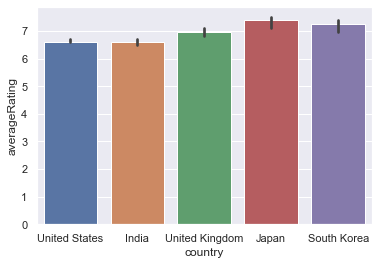

In [318]:
sns.barplot(x='country',y='averageRating',data=filtered_country, estimator = np.median)

<AxesSubplot:xlabel='country', ylabel='averageRating'>

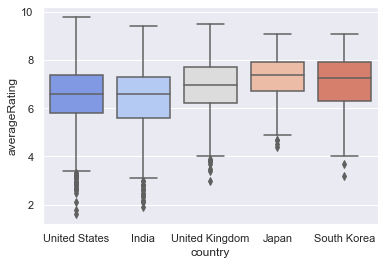

In [320]:
sns.boxplot(x="country", y="averageRating", data=filtered_country, palette='coolwarm')

<AxesSubplot:xlabel='director', ylabel='averageRating'>

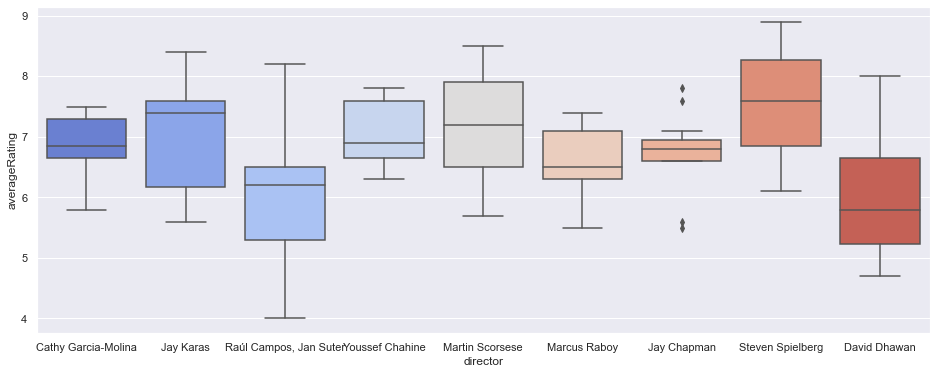

In [324]:
plt.figure(figsize=(16, 6))
sns.boxplot(x="director", y="averageRating", data=filtered_director, palette='coolwarm')

<AxesSubplot:ylabel='numVotes'>

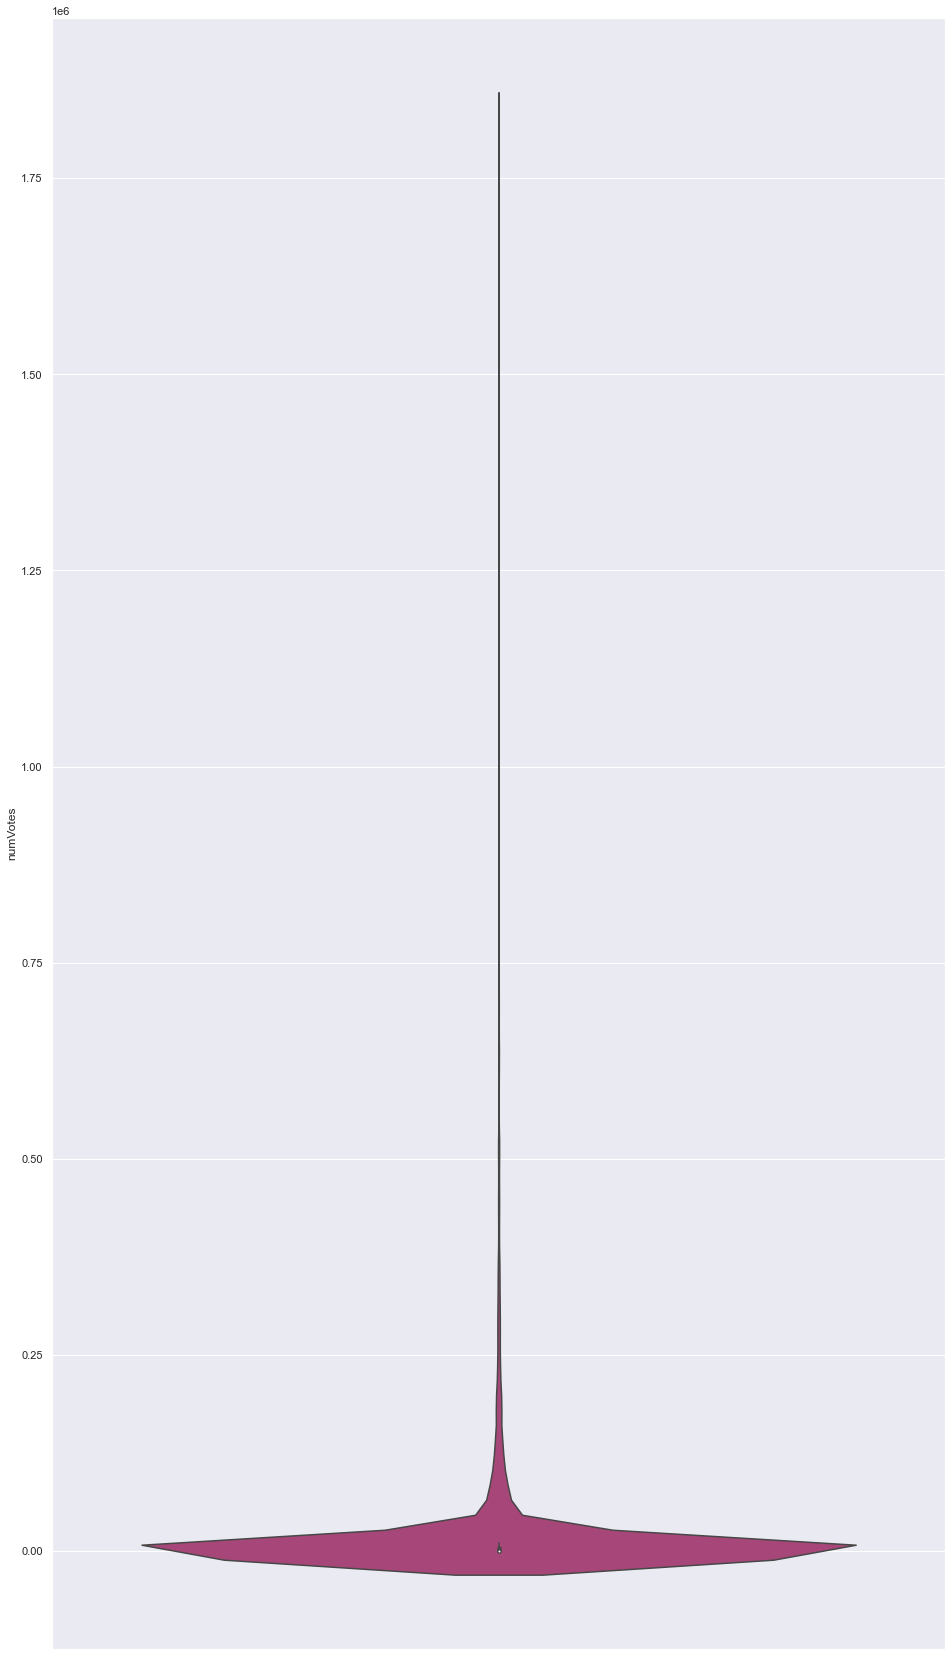

In [343]:
plt.figure(figsize=(16, 30))
sns.violinplot(y="numVotes", data=netflix_df, palette='magma')

In [330]:
netflix_df.describe()

release_year     original  averageRating      numVotes
count   7787.000000  7787.000000    6197.000000  6.197000e+03
mean    2013.932580     0.053551       6.528578  1.869672e+04
std        8.757395     0.225144       1.225234  8.543366e+04
min     1925.000000     0.000000       1.500000  5.000000e+00
25%     2013.000000     0.000000       5.800000  1.000000e+02
50%     2017.000000     0.000000       6.600000  7.050000e+02
75%     2018.000000     0.000000       7.400000  4.093000e+03
max     2021.000000     1.000000       9.800000  1.829868e+06

In [ ]:
#7.05 X 100 = 705
#1 X 100 = 100
# https://www.quora.com/What-does-1-094E+02-mean-in-math#:~:text=This%20notation%20is%20seen%20on%20calculator%20displays.&text=The%20E%2B02%20means%20to,10%20to%20the%202nd%20power.&text=The%20number%20after%20the%20E,the%20specified%20number%20of%20places.

In [355]:
# filter top 50 content base on average rating
sort_by_rating = netflix_df.sort_values(by=['averageRating'], ascending=False)
sort_by_rating
# user_rating_filter = netflix_df['averageRating'].value_counts().nlargest(50).index
# user_rating_filter
# filtered_rating = netflix_df[netflix_df['averageRating'].isin(user_rating_filter)]
# filtered_rating_sorted = filtered_rating.sort_values(by=['averageRating'], ascending=False)
# filtered_rating_sorted

type                                    title            director  \
4330     Movie                                 Cristina      Michèle Ohayon   
2767   TV Show                             Breaking Bad                 NaN   
13606  TV Show                          Planet Earth II                 NaN   
8021     Movie                              Hide & Seek       Shawn Arranha   
22049    Movie                                    Tiger  Sartaj Singh Pannu   
...        ...                                      ...                 ...   
23866    Movie                                   اشتباك        Mohamed Diab   
23867    Movie                                الف مبروك   Ahmed Nader Galal   
23951    Movie        Zipi & Zape y la Isla del Capitan        Oskar Santos   
24009    Movie                        Zulu Man in Japan                 NaN   
24011    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS            Sam Dunn   

                                                    cast  \
4330                                                 NaN   
2767   Bryan Cranston, Aaron Paul, Anna Gunn, Dean No...   
13606                                 David Attenborough   
8021   Purab Kohli, Arjan Bajwa, Mrinalini Sharma, Sa...   
22049  Sippy Gill, Ihana Dhillon, Yograj Singh, Yashp...   
...                                                  ...   
23866  Nelly Karim, Hany Adel, Tarek Abdel Aziz, Ahme...   
23867  Ahmed Helmy, Laila Ezz El Arab, Mahmoud El Fis...   
23951  Teo Planell, Toni Gómez, Elena Anaya, Iria Cas...   
24009                                            Nasty C   
24011                                                NaN   

                                     country          date_added  \
4330                           United States        July 4, 2019   
2767                           United States      August 2, 2013   
13606                         United Kingdom   December 25, 2017   
8021                                   India       March 1, 2018   
22049                                  India     October 1, 2018   
...                                      ...                 ...   
23866                          Egypt, France    October 11, 2018   
23867                                  Egypt      April 25, 2020   
23951                                  Spain        July 1, 2017   
24009                                    NaN  September 25, 2020   
24011  United Kingdom, Canada, United States       March 1, 2020   

       release_year rating   duration  \
4330           2016  TV-14     40 min   
2767           2013  TV-MA  5 Seasons   
13606          2016   TV-G   1 Season   
8021           2010  TV-14     96 min   
22049          2016  TV-14    130 min   
...             ...    ...        ...   
23866          2016  TV-14     98 min   
23867          2009  TV-14    115 min   
23951          2016  TV-PG    105 min   
24009          2019  TV-MA     44 min   
24011          2019  TV-MA     90 min   

                                               listed_in  ...     titleType  \
4330                                       Documentaries  ...         short   
2767             Crime TV Shows, TV Dramas, TV Thrillers  ...      tvSeries   
13606  British TV Shows, Docuseries, Science & Nature TV  ...  tvMiniSeries   
8021      Horror Movies, International Movies, Thrillers  ...         short   
22049   Action & Adventure, Dramas, International Movies  ...     tvEpisode   
...                                                  ...  ...           ...   
23866   Dramas, Independent Movies, International Movies  ...           NaN   
23867             Comedies, Dramas, International Movies  ...           NaN   
23951                 Children & Family Movies, Comedies  ...           NaN   
24009  Documentaries, International Movies, Music & M...  ...           NaN   
24011                    Documentaries, Music & Musicals  ...           NaN   

          primaryTitle    originalTitle isAdult startYear endYear  \
4330        

<AxesSubplot:ylabel='averageRating'>

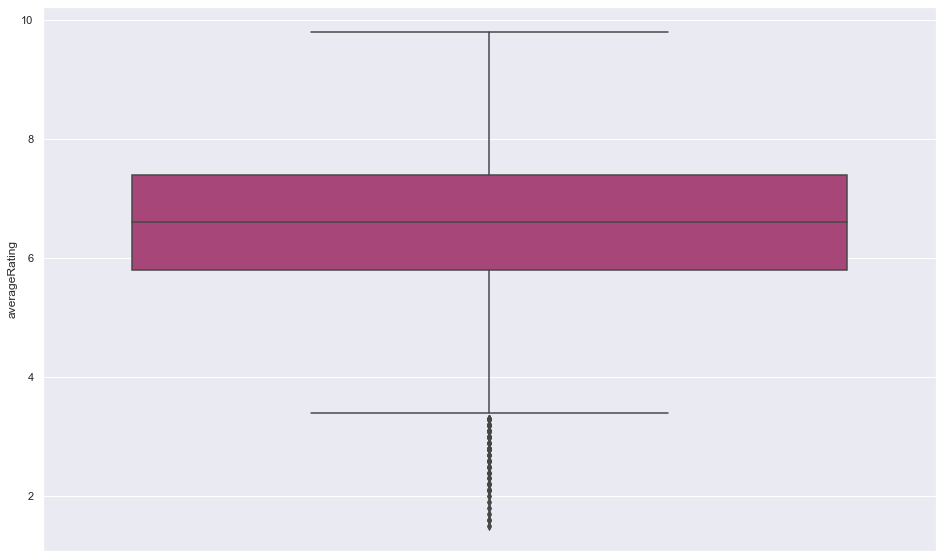

In [356]:
plt.figure(figsize=(16, 10))
sns.boxplot(y="averageRating", data=netflix_df, palette='magma')

In [363]:
# https://www.listendata.com/2019/07/how-to-filter-pandas-dataframe.html
# newdf = df[(df.origin == "JFK") & (df.carrier == "B6")]
filtered_df = netflix_df[(netflix_df['averageRating'] >= 6.6) & (netflix_df['numVotes'] >=100)]
filtered_df.sort_values(by=['numVotes', 'averageRating'], ascending=False)

type                                          title  \
13971    Movie                                   Pulp Fiction   
20117    Movie                                     The Matrix   
20011    Movie  The Lord of the Rings: The Return of the King   
20014    Movie          The Lord of the Rings: The Two Towers   
2767   TV Show                                   Breaking Bad   
...        ...                                            ...   
22572  TV Show                                     Twirlywoos   
7792     Movie                                        Haywire   
11376    Movie                                    Mayday Life   
17346    Movie        The Adventures of Sharkboy and Lavagirl   
5219     Movie                  Don't Crack Under Pressure II   

                              director  \
13971                Quentin Tarantino   
20117  Lilly Wachowski, Lana Wachowski   
20011                    Peter Jackson   
20014                    Peter Jackson   
2767                               NaN   
...                                ...   
22572                              NaN   
7792                 Steven Soderbergh   
11376                         Muh Chen   
17346                 Robert Rodriguez   
5219                    Thierry Donard   

                                                    cast  \
13971  John Travolta, Samuel L. Jackson, Uma Thurman,...   
20117  Keanu Reeves, Laurence Fishburne, Carrie-Anne ...   
20011  Elijah Wood, Ian McKellen, Liv Tyler, Viggo Mo...   
20014  Elijah Wood, Ian McKellen, Liv Tyler, Viggo Mo...   
2767   Bryan Cranston, Aaron Paul, Anna Gunn, Dean No...   
...                                                  ...   
22572                                      Linda Bassett   
7792   Gina Carano, Michael Fassbender, Ewan McGregor...   
11376                Mayday, Huang Bo, Tony Leung Ka-fai   
17346  Taylor Lautner, Taylor Dooley, Cayden Boyd, Ge...   
5219   Davide Carrera, Eric Duguil, Jesse Richman, Ri...   

                          country        date_added  release_year rating  \
13971               United States   January 1, 2019          1994      R   
20117               United States  November 1, 2019          1999      R   
20011  New Zealand, United States   January 1, 2020          2003  PG-13   
20014  New Zealand, United States   January 1, 2020          2002  PG-13   
2767                United States    August 2, 2013          2013  TV-MA   
...                           ...               ...           ...    ...   
22572              United Kingdom      May 15, 2020          2018   TV-Y   
7792       Ireland, United States     March 1, 2020          2011      R   
11376               China, Taiwan   August 23, 2019          2019  TV-PG   
17346               United States  December 2, 2020          2005     PG   
5219                       France     June 12, 2020          2016  TV-MA   

        duration                                          listed_in  ...  \
13971    154 min                Classic Movies, Cult Movies, Dramas  ...   
20117    136 min               Action & Adventure, Sci-Fi & Fantasy  ...   
20011    201 min               Action & Adventure, Sci-Fi & Fantasy  ...   
20014    179 min               Action & Adventure, Sci-Fi & Fantasy  ...   
2767   5 Seasons            Crime TV Shows, TV Dramas, TV Thrillers  ...   
...          ...                                                ...  ...   
22572  2 Seasons                         British TV Shows, Kids' TV  ...   
7792      93 min                                 Action & Adventure  ...   
11376    120 min             International Movies, Music & Musicals  ...   
17346     93 min                           Children & Family Movies  ...   
5219      88 min  Action & Adventure, Documentaries, Internation...  ...   

       titleType                                   primaryTitle  \
13971      movie                                   Pulp Fiction   
20117      movie                           

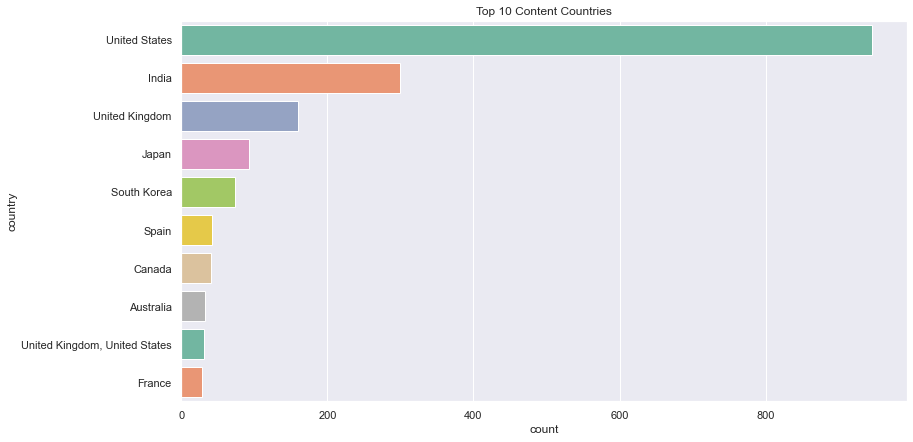

In [496]:
# plt.figure(figsize=(13,7))
# plt.title(‘Top 15 Countries Contributor on Netflix’)
# plt.xlabel(‘Titles’)
# plt.ylabel(‘Country’)
# plt.show()


plt.figure(figsize=(13,7))
plt.title('Top 10 Content Countries')
sns.set(style="darkgrid")
ax = sns.countplot(y="country", data=filtered_df, palette="Set2", \
                   order=filtered_df['country'].value_counts().index[0:10])

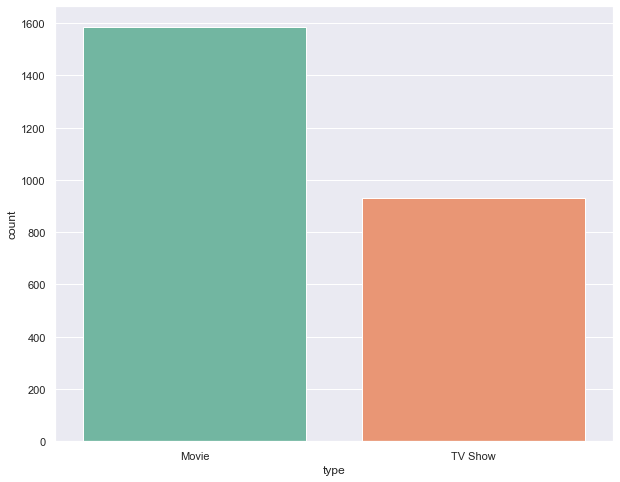

In [371]:
plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
ax = sns.countplot(x="type", data=filtered_df, palette="Set2", \
                   order=filtered_df['type'].value_counts().index[0:2])

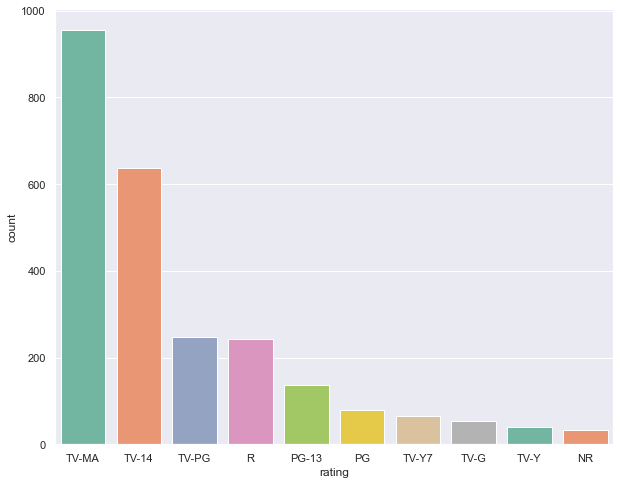

In [372]:
plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
ax = sns.countplot(x="rating", data=filtered_df, palette="Set2", \
                   order=filtered_df['rating'].value_counts().index[0:10])

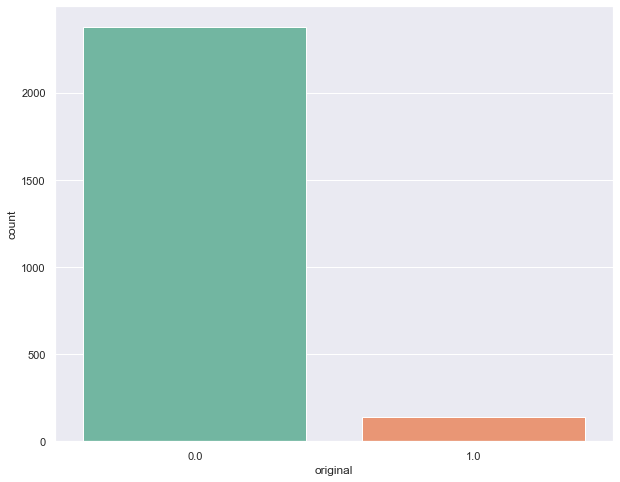

In [376]:
plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
ax = sns.countplot(x="original", data=filtered_df, palette="Set2", \
                   order=filtered_df['original'].value_counts().index[0:10])

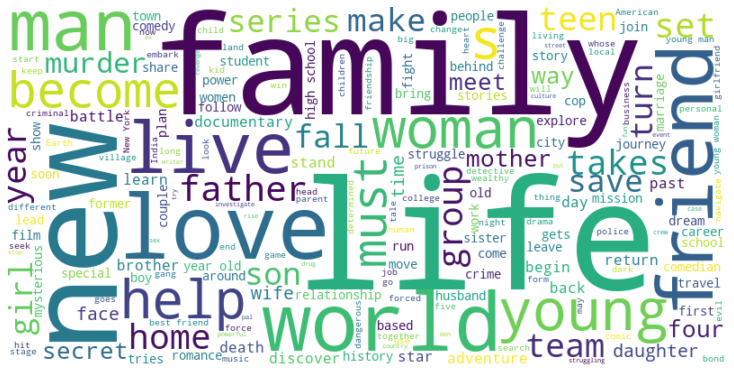

In [379]:
# https://stackoverflow.com/questions/53997443/how-to-add-extra-stop-words-in-addition-to-default-stopwords-in-wordcloud
    
text = " ".join(word for word in netflix_df['description'].astype(str))

stop_words = ["one", "two", "three", "find", "finds", "take"] + list(STOPWORDS)

wordcloud = WordCloud(stopwords=stop_words, background_color="white", width=800, height=400).generate(text)
plt.figure(figsize=(10,6))
plt.axis("off")
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

In [477]:
# https://www.kite.com/python/answers/how-to-remove-newline-character-from-a-list-in-python#:~:text=Use%20str.,well%20as%20newline%20characters%20removed.
test_list = list(filtered_df['listed_in'])
converted_list = []

for element in test_list:
    test = element.strip()
    converted_list.append(test)

print(converted_list)

['International TV Shows, TV Dramas, TV Sci-Fi & Fantasy', 'Documentaries, International Movies, Sports Movies', 'Documentaries', 'Dramas, International Movies, Romantic Movies', 'Action & Adventure, Sci-Fi & Fantasy', 'International TV Shows, Romantic TV Shows, TV Dramas', 'Dramas, International Movies, Sports Movies', 'International TV Shows, Korean TV Shows, Romantic TV Shows', 'Crime TV Shows, Docuseries', 'Action & Adventure', 'Dramas, Independent Movies, International Movies', 'Comedies, Dramas, International Movies', 'Dramas, Independent Movies', 'Dramas, International Movies, Thrillers', 'Comedies, Dramas, International Movies', 'Dramas, International Movies', 'Dramas, International Movies', "Kids' TV, TV Action & Adventure, TV Sci-Fi & Fantasy", 'Documentaries', 'International TV Shows, Romantic TV Shows, Spanish-Language TV Shows', 'Comedies, LGBTQ Movies', 'Comedies, Dramas, Romantic Movies', 'Comedies, Romantic Movies', 'Reality TV', 'Docuseries', 'Docuseries, International

In [478]:
text = ",".join(converted_list)

In [479]:
text

"International TV Shows, TV Dramas, TV Sci-Fi & Fantasy,Documentaries, International Movies, Sports Movies,Documentaries,Dramas, International Movies, Romantic Movies,Action & Adventure, Sci-Fi & Fantasy,International TV Shows, Romantic TV Shows, TV Dramas,Dramas, International Movies, Sports Movies,International TV Shows, Korean TV Shows, Romantic TV Shows,Crime TV Shows, Docuseries,Action & Adventure,Dramas, Independent Movies, International Movies,Comedies, Dramas, International Movies,Dramas, Independent Movies,Dramas, International Movies, Thrillers,Comedies, Dramas, International Movies,Dramas, International Movies,Dramas, International Movies,Kids' TV, TV Action & Adventure, TV Sci-Fi & Fantasy,Documentaries,International TV Shows, Romantic TV Shows, Spanish-Language TV Shows,Comedies, LGBTQ Movies,Comedies, Dramas, Romantic Movies,Comedies, Romantic Movies,Reality TV,Docuseries,Docuseries, International TV Shows, Science & Nature TV,Dramas, Independent Movies, International Mov

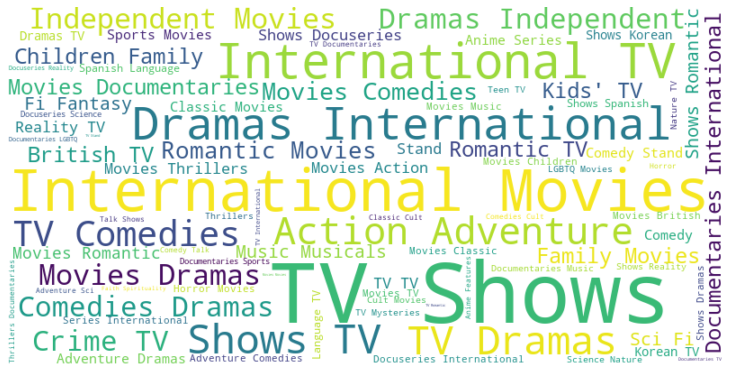

In [480]:
stop_words = [""] + list(STOPWORDS)

wordcloud = WordCloud(stopwords=stop_words, background_color="white", width=800, height=400).generate(text)
plt.figure(figsize=(10,6))
plt.axis("off")
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

In [483]:
converted_list",".join(l)

['International TV Shows, TV Dramas, TV Sci-Fi & Fantasy',
 'Documentaries, International Movies, Sports Movies',
 'Documentaries',
 'Dramas, International Movies, Romantic Movies',
 'Action & Adventure, Sci-Fi & Fantasy',
 'International TV Shows, Romantic TV Shows, TV Dramas',
 'Dramas, International Movies, Sports Movies',
 'International TV Shows, Korean TV Shows, Romantic TV Shows',
 'Crime TV Shows, Docuseries',
 'Action & Adventure',
 'Dramas, Independent Movies, International Movies',
 'Comedies, Dramas, International Movies',
 'Dramas, Independent Movies',
 'Dramas, International Movies, Thrillers',
 'Comedies, Dramas, International Movies',
 'Dramas, International Movies',
 'Dramas, International Movies',
 "Kids' TV, TV Action & Adventure, TV Sci-Fi & Fantasy",
 'Documentaries',
 'International TV Shows, Romantic TV Shows, Spanish-Language TV Shows',
 'Comedies, LGBTQ Movies',
 'Comedies, Dramas, Romantic Movies',
 'Comedies, Romantic Movies',
 'Reality TV',
 'Docuseries',
 '

In [ ]:
genre_df = DataFrame (your_list,columns=['Column_Name'])

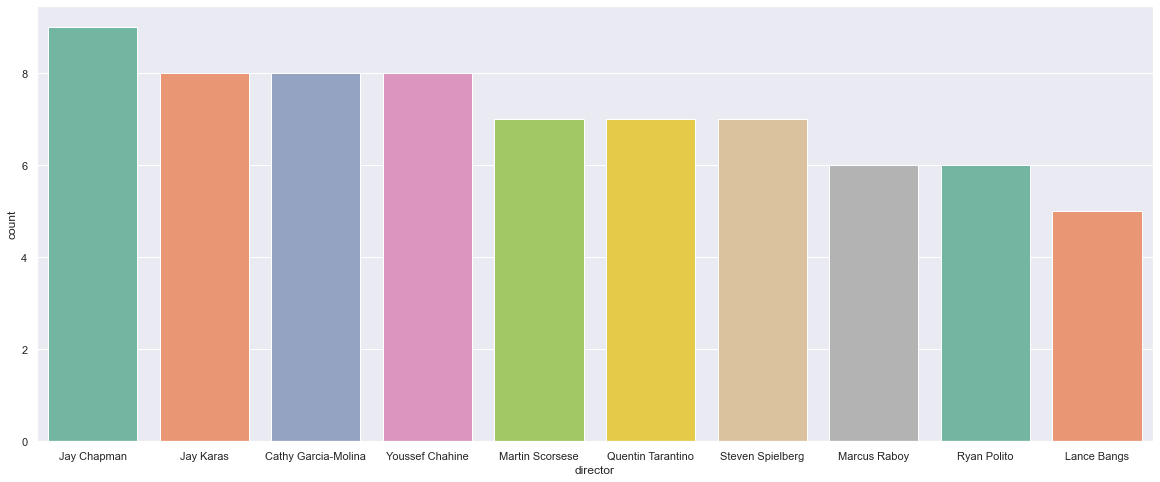

In [472]:
plt.figure(figsize=(20,8))
sns.set(style="darkgrid")
ax = sns.countplot(x="director", data=filtered_df, palette="Set2", \
                   order=filtered_df['director'].value_counts().index[0:10])

In [501]:
# https://www.kaggle.com/granjithkumar/netflix-eda-with-python
# https://medium.com/analytics-vidhya/netflix-movies-and-tvshows-exploratory-data-analysis-eda-and-visualization-using-python-80753fcfcf7
# query4 = filtered_df.groupby(['numVotes', 'averageRating']).count()
# sub_query6 = query4[('director')].sort_values(ascending =False)[:10]

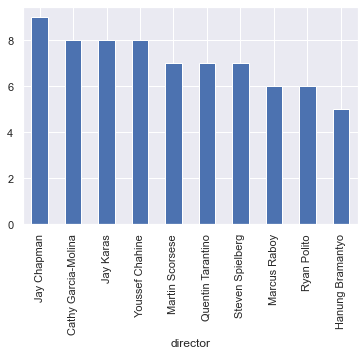

In [508]:
# ax = chipo.groupby('item_name')['quantity'].sum().nsmallest(5).plot(kind='bar')
# ax.set(title = " 5 Least Item Ordered", xlabel="Item Name", ylabel ="Quantity")
ax = filtered_df.groupby('director')['averageRating'].count().nlargest(10).plot(kind='bar')

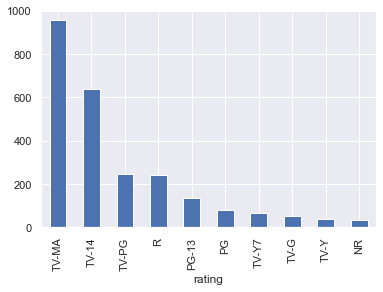

In [510]:
ax = filtered_df.groupby('rating')['averageRating'].count().nlargest(10).plot(kind='bar')

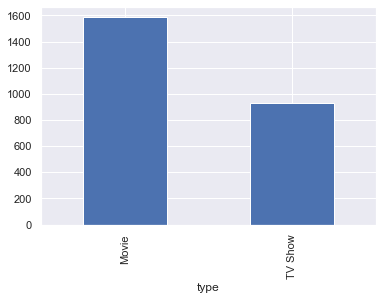

In [518]:
ax = filtered_df.groupby('type')['averageRating'].count().plot(kind='bar')

<AxesSubplot:xlabel='type', ylabel='count'>

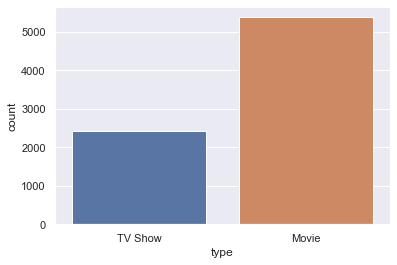

In [512]:
sns.countplot(x='type',data=netflix_df)

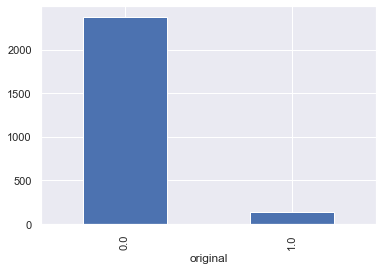

In [514]:
ax = filtered_df.groupby('original')['averageRating'].count().plot(kind='bar')

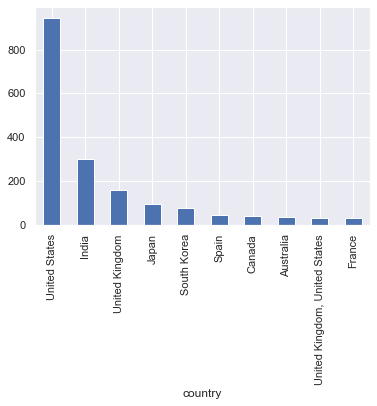

In [520]:
ax = filtered_df.groupby('country')['averageRating'].count().nlargest(10).plot(kind='bar')

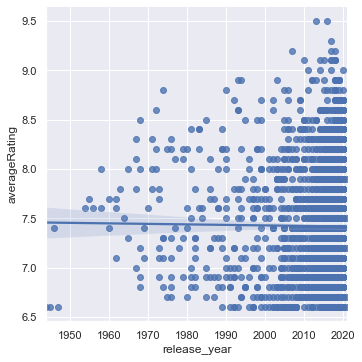

In [522]:
sns.lmplot(x='release_year',y='averageRating',data=filtered_df)

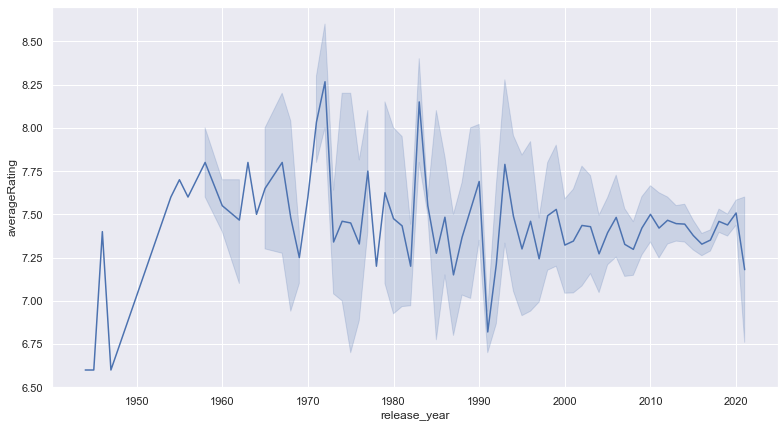

In [525]:
fig, ax = plt.subplots(figsize=(13, 7))
sns.lineplot(data=filtered_df, x='release_year', y='averageRating')
plt.show()

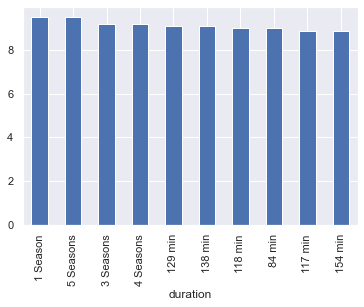

In [538]:
ax = filtered_df.groupby('duration')['averageRating'].agg('max').nlargest(10).plot(kind='bar')

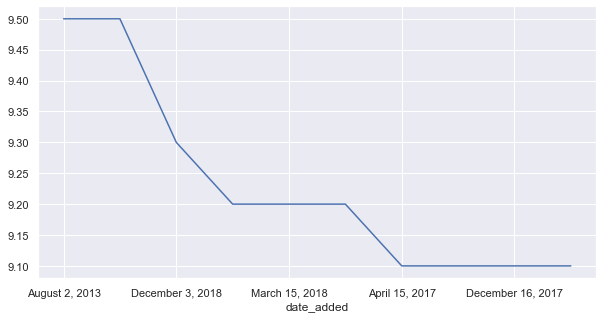

In [548]:
ax = filtered_df.groupby('date_added')['averageRating'].agg('max').nlargest(10).plot(kind='line', figsize=(10, 5))

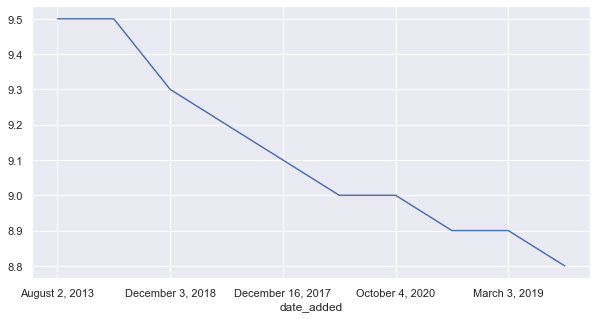

In [551]:
ax = filtered_df.groupby('date_added')['averageRating'].agg('median').nlargest(10).plot(kind='line', figsize=(10, 5))

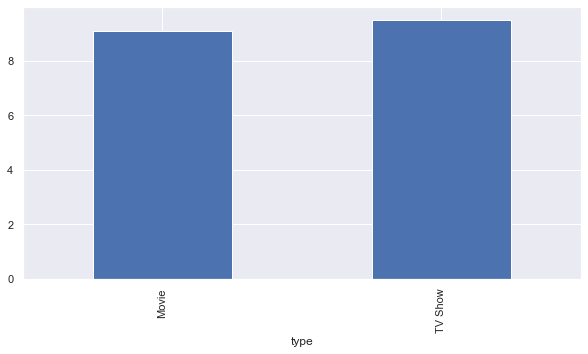

In [543]:
ax = filtered_df.groupby('type')['averageRating'].agg('max').plot(kind='bar', figsize=(10, 5))

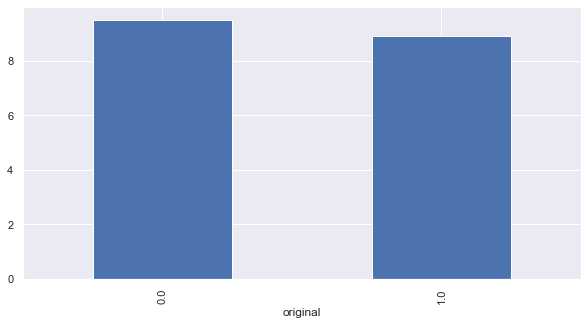

In [544]:
ax = filtered_df.groupby('original')['averageRating'].agg('max').plot(kind='bar', figsize=(10, 5))

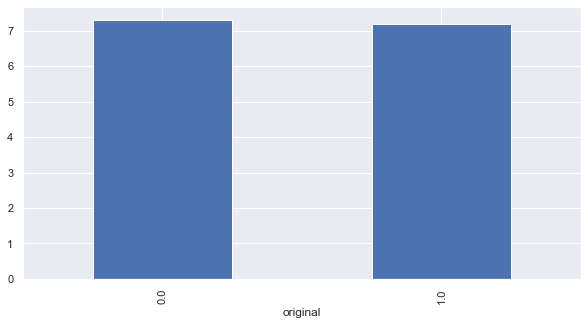

In [545]:
ax = filtered_df.groupby('original')['averageRating'].agg('median').plot(kind='bar', figsize=(10, 5))

In [ ]:
# filtered_cast_shows = netflix_shows_df[netflix_shows_df.cast != ‘No Cast’].set_index(‘title’).cast.str.split(‘, ‘, expand=True).stack().reset_index(level=1, drop=True)
# plt.figure(figsize=(13,7))
# plt.title(‘Top 10 Actor TV Shows Based on The Number of Titles’)
# sns.countplot(y = filtered_cast_shows, order=filtered_cast_shows.value_counts().index[:10], palette=’pastel’)
# plt.show()

In [604]:
cast_df = filtered_df['cast'].str.split(', ', expand=True).stack()
top_10_cast = cast_df.value_counts().nlargest(10)
cast_df2 = pd.DataFrame(top_10_cast)
cast_df2['cast'] = cast_df2.index
cast_df2.columns = ['noTimes', 'Cast']
cast_df2.reset_index(drop=True, inplace=True)
cast_df2

noTimes               Cast
0       14     Shah Rukh Khan
1       14   Takahiro Sakurai
2       14   Naseeruddin Shah
3       13       Paresh Rawal
4       13          Yuki Kaji
5       12        Daisuke Ono
6       11  Samuel L. Jackson
7       11    Erin Fitzgerald
8       11       Laura Bailey
9       11        Anupam Kher

In [622]:
keywords = list(cast_df2['Cast'])
keywords

['Shah Rukh Khan',
 'Takahiro Sakurai',
 'Naseeruddin Shah',
 'Paresh Rawal',
 'Yuki Kaji',
 'Daisuke Ono',
 'Samuel L. Jackson',
 'Erin Fitzgerald',
 'Laura Bailey',
 'Anupam Kher']

In [628]:
# https://medium.com/analytics-vidhya/filter-pandas-dataframe-rows-by-a-list-of-strings-e95c225822fa
filtered_df['cast'].fillna('No cast info', inplace=True)
top_cast_df = filtered_df[filtered_df['cast'].str.contains('|'.join(keywords))]
top_cast_df

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


type                                title  \
145      Movie                          3 Deewarein   
436      Movie                          A Wednesday   
774      Movie                              Aitraaz   
1114     Movie                      Andaz Apna Apna   
1183   TV Show  Anohana: The Flower We Saw That Day   
...        ...                                  ...   
22891  TV Show                       Vampire Knight   
23002    Movie                                Vivah   
23092    Movie                          Wake Up Sid   
23334    Movie                              Welcome   
23945    Movie             Zindagi Na Milegi Dobara   

                                                director  \
145                                      Nagesh Kukunoor   
436                                        Neeraj Pandey   
774    Abbas Alibhai Burmawalla, Mastan Alibhai Burma...   
1114                                   Rajkumar Santoshi   
1183                                                 NaN   
...                                                  ...   
22891                                                NaN   
23002                                 Sooraj R. Barjatya   
23092                                     Ayaan Mukherji   
23334                                       Anees Bazmee   
23945                                        Zoya Akhtar   

                                                    cast country  \
145    Naseeruddin Shah, Jackie Shroff, Juhi Chawla, ...     NaN   
436    Anupam Kher, Naseeruddin Shah, Jimmy Shergill,...   India   
774    Akshay Kumar, Kareena Kapoor, Priyanka Chopra,...   India   
1114   Aamir Khan, Salman Khan, Raveena Tandon, Karis...   India   
1183   Miyu Irino, Ai Kayano, Haruka Tomatsu, Takahir...   Japan   
...                                                  ...     ...   
22891  Daisuke Kishio, Ezra Weisz, Mamoru Miyano, Vic...   Japan   
23002  Shahid Kapoor, Amrita Rao, Anupam Kher, Alok N...   India   
23092  Ranbir Kapoor, Konkona Sen Sharma, Shruti Bapn...   India   
23334  Akshay Kumar, Katrina Kaif, Nana Patekar, Anil...   India   
23945  Hrithik Roshan, Abhay Deol, Farhan Akhtar, Kat...   India   

               date_added  release_year rating   duration  \
145     December 31, 2019          2003  TV-MA    121 min   
436      November 1, 2018          2008  TV-MA    103 min   
774         March 1, 2018          2004  TV-14    153 min   
1114         May 11, 2020          1994  TV-14    160 min   
1183        July 15, 2019          2011  TV-14   1 Season   
...                   ...           ...    ...        ...   
22891    October 15, 2016          2008  TV-14  2 Seasons   
23002       June 25, 2020          2006  TV-14    166 min   
23092     October 1, 2018          2009  TV-14    132 min   
23334  September 28, 2020          2007  TV-PG    149 min   
23945   December 15, 2019          2011  TV-14    154 min   

                                               listed_in  ... titleType  \
145              Dramas, International Movies, Thrillers  ...     movie   
436     Action & Adventure, Dramas, International Movies  ...     movie   
774    International Movies, Music & Musicals, Romant...  ...     movie   
1114           Action & Adventure, Comedies, Cult Movies  ...     movie   
1183   Anime Series, International TV Shows, Teen TV ...  ...  tvSeries   
...                                                  ...  ...       ...   
22891  Anime Series, International TV Shows, Romantic...  ...  tvSeries   
23002      Dramas, International Movies, Romantic Movies  ...     movie   
23092    Comedies, International Movies, Romantic Movies  ...     movie   
23334   Comedies, International Movies, Music & Musicals  ...     short   
23945             Comedies, Dramas, International Movies  ...     movie   

                              primaryTitle  \
145                            3 Deewarein   
436                            A Wednesday   
774                                Aitr

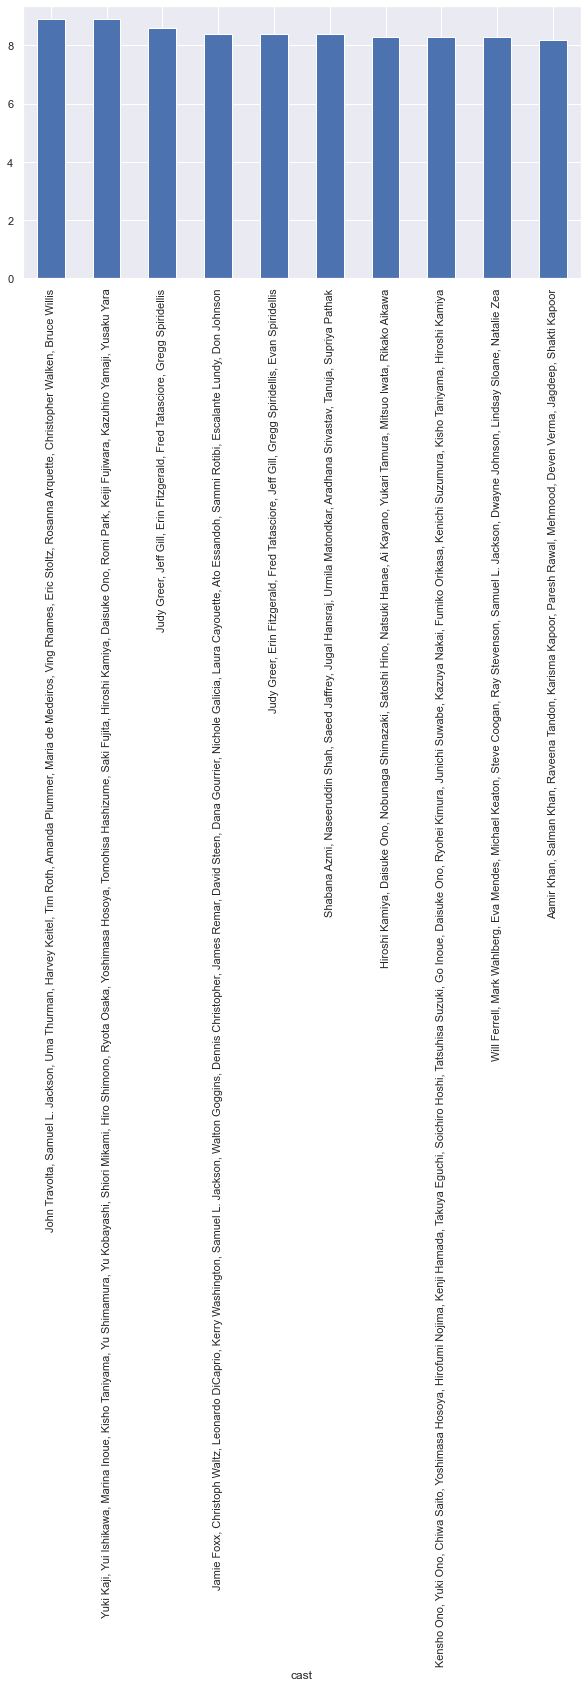

In [633]:
ax = top_cast_df.groupby('cast')['averageRating'].agg('median').sample(10).plot(kind='bar', figsize=(10, 5))

<AxesSubplot:xlabel='Cast', ylabel='noTimes'>

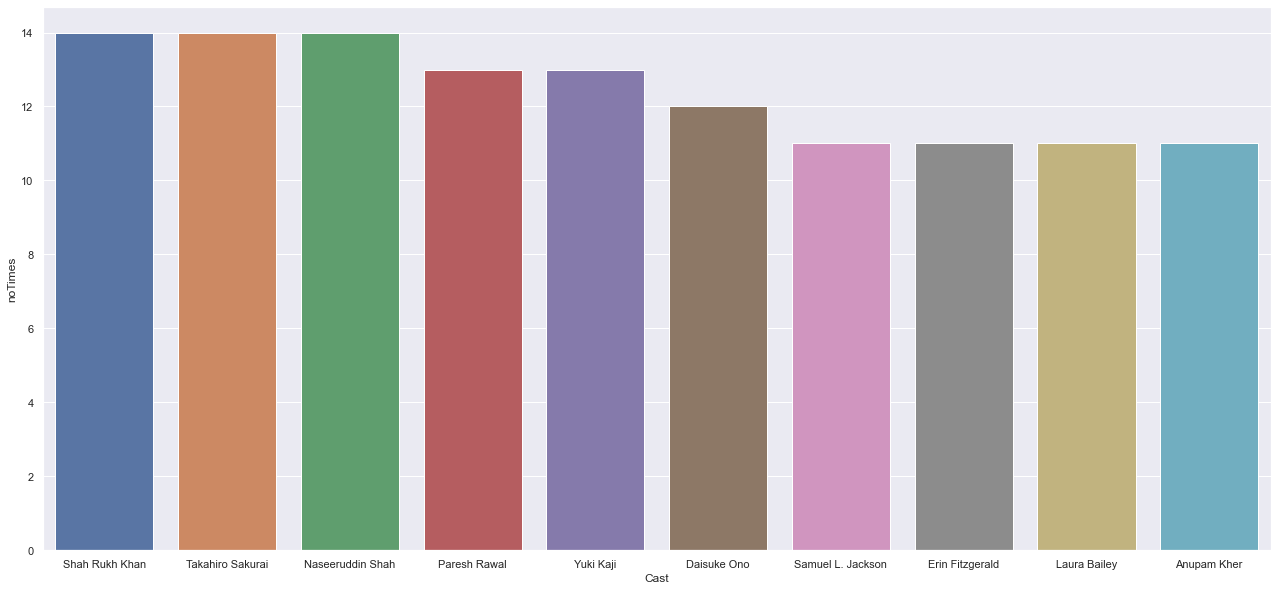

In [609]:
plt.figure(figsize=(22,10))
sns.set(style="darkgrid")
sns.barplot(x='Cast',y='noTimes',data=cast_df2)